In [1]:
from CovMat import *
import gc
from cl_and_cov import *
from signal_to_noise import *
from fisher_FoM import *

In [2]:
import numpy as np
Omega_m=0.315
Omega_b=0.045
h=0.67
sigma8=0.8
n_s=0.96
w_0 = -1
w_a = 0
transfer_function = 'bbks'
fsky = 0.4
ell = np.arange(2, 10001)

In [3]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c = Omega_m-Omega_b, Omega_b=Omega_b, h=h, sigma8=sigma8, n_s=n_s,
    transfer_function=transfer_function)

In [4]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
numdenPerStr = arcmin_per_str*10.024

In [5]:
#binning in l
binl=10**np.linspace(np.log10(50), np.log10(8500), 20)

In [6]:
#try a flat distribution
dndz_f = np.zeros([400,2])
dndz_f[:, 0] = np.linspace(0.001, 4.001, 400)
dndz_f[:, 1] = np.ones(400)

In [7]:
cl_f = {} 
cov_f = {}
redshifts_f = {}
sliced_dndz_f = {}

for n in range(1,5):
    for btype in ["z", "n"]:
        cov_f["{0}_{1}".format(btype, n)], cl_f["{0}_{1}".format(btype, n)], redshifts_f["{0}_{1}".format(btype, n)], sliced_dndz_f["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz_f, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4)

In [8]:
stn_f = {}
for i in ["z", "n"]:
    for j in range(1,5):
        stn_f["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl_f["{0}_{1}".format(i, j)], cov = cov_f["{0}_{1}".format(i, j)], ell=ell)

In [9]:
fisher_f = {}
for i in ["z", "n"]:
    for j in range(1,5):
        global dndz_sliced
        dndz_sliced = sliced_dndz_f["{0}_{1}".format(i, j)]
        fisher_f["{0}_{1}".format(i,j)] = fisher_matrix(covariance = cov_f["{0}_{1}".format(i, j)], dndz_sliced = sliced_dndz_f["{0}_{1}".format(i, j)])

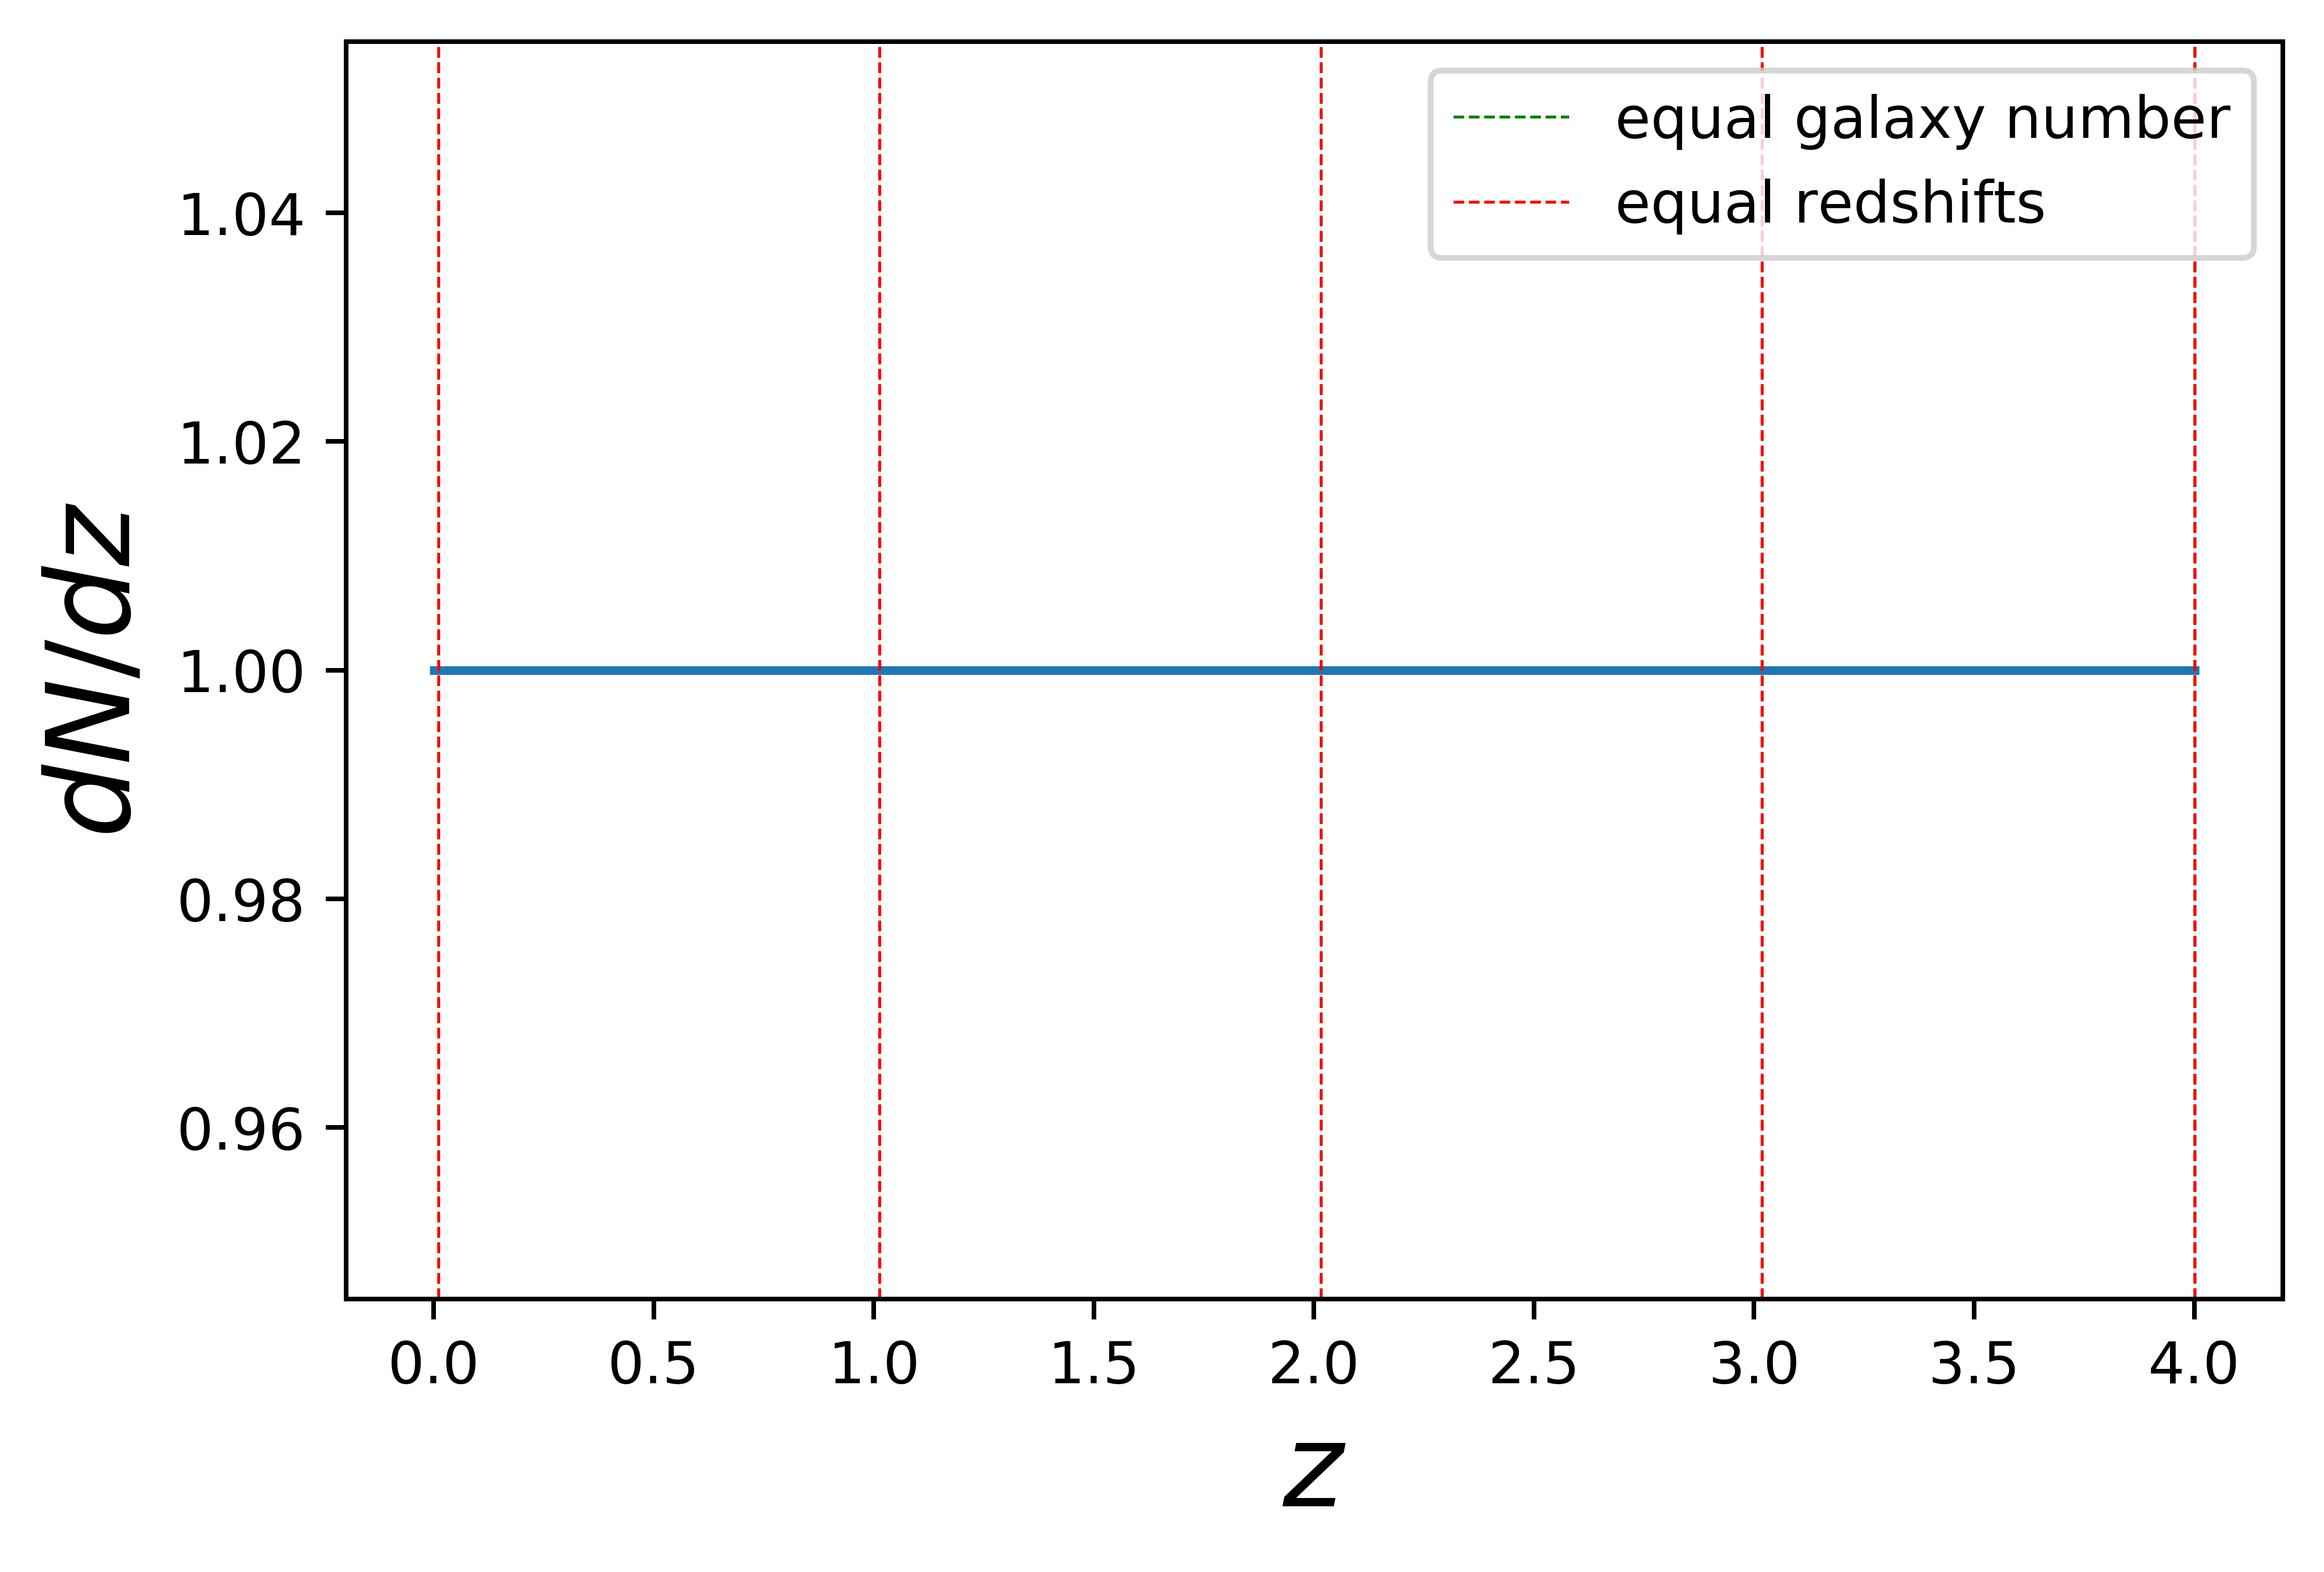

In [10]:
plt.plot(dndz_f[:,0], dndz_f[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_f["n_4"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number")

for x in redshifts_f["z_4"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal redshifts")

plt.legend(loc='upper right')
plt.show()

In [11]:
redshifts_f["n_4"]

[0.011025062656641604,
 1.0135313283208018,
 2.016037593984962,
 3.0185438596491223,
 4.001]

In [12]:
redshifts_f["z_4"]

[0.011025062656641604,
 1.0135313283208018,
 2.016037593984962,
 3.0185438596491223,
 4.001]

In [15]:
len(sliced_dndz_f["n_4"]["bin_1"]),len(sliced_dndz_f["n_4"]["bin_2"]), len(sliced_dndz_f["n_4"]["bin_3"]),len(sliced_dndz_f["n_4"]["bin_4"])

(100, 100, 100, 100)

In [14]:
len(sliced_dndz_f["z_4"]["bin_1"]), len(sliced_dndz_f["z_4"]["bin_2"]), len(sliced_dndz_f["z_4"]["bin_3"]), len(sliced_dndz_f["z_4"]["bin_4"])

(100, 100, 100, 100)

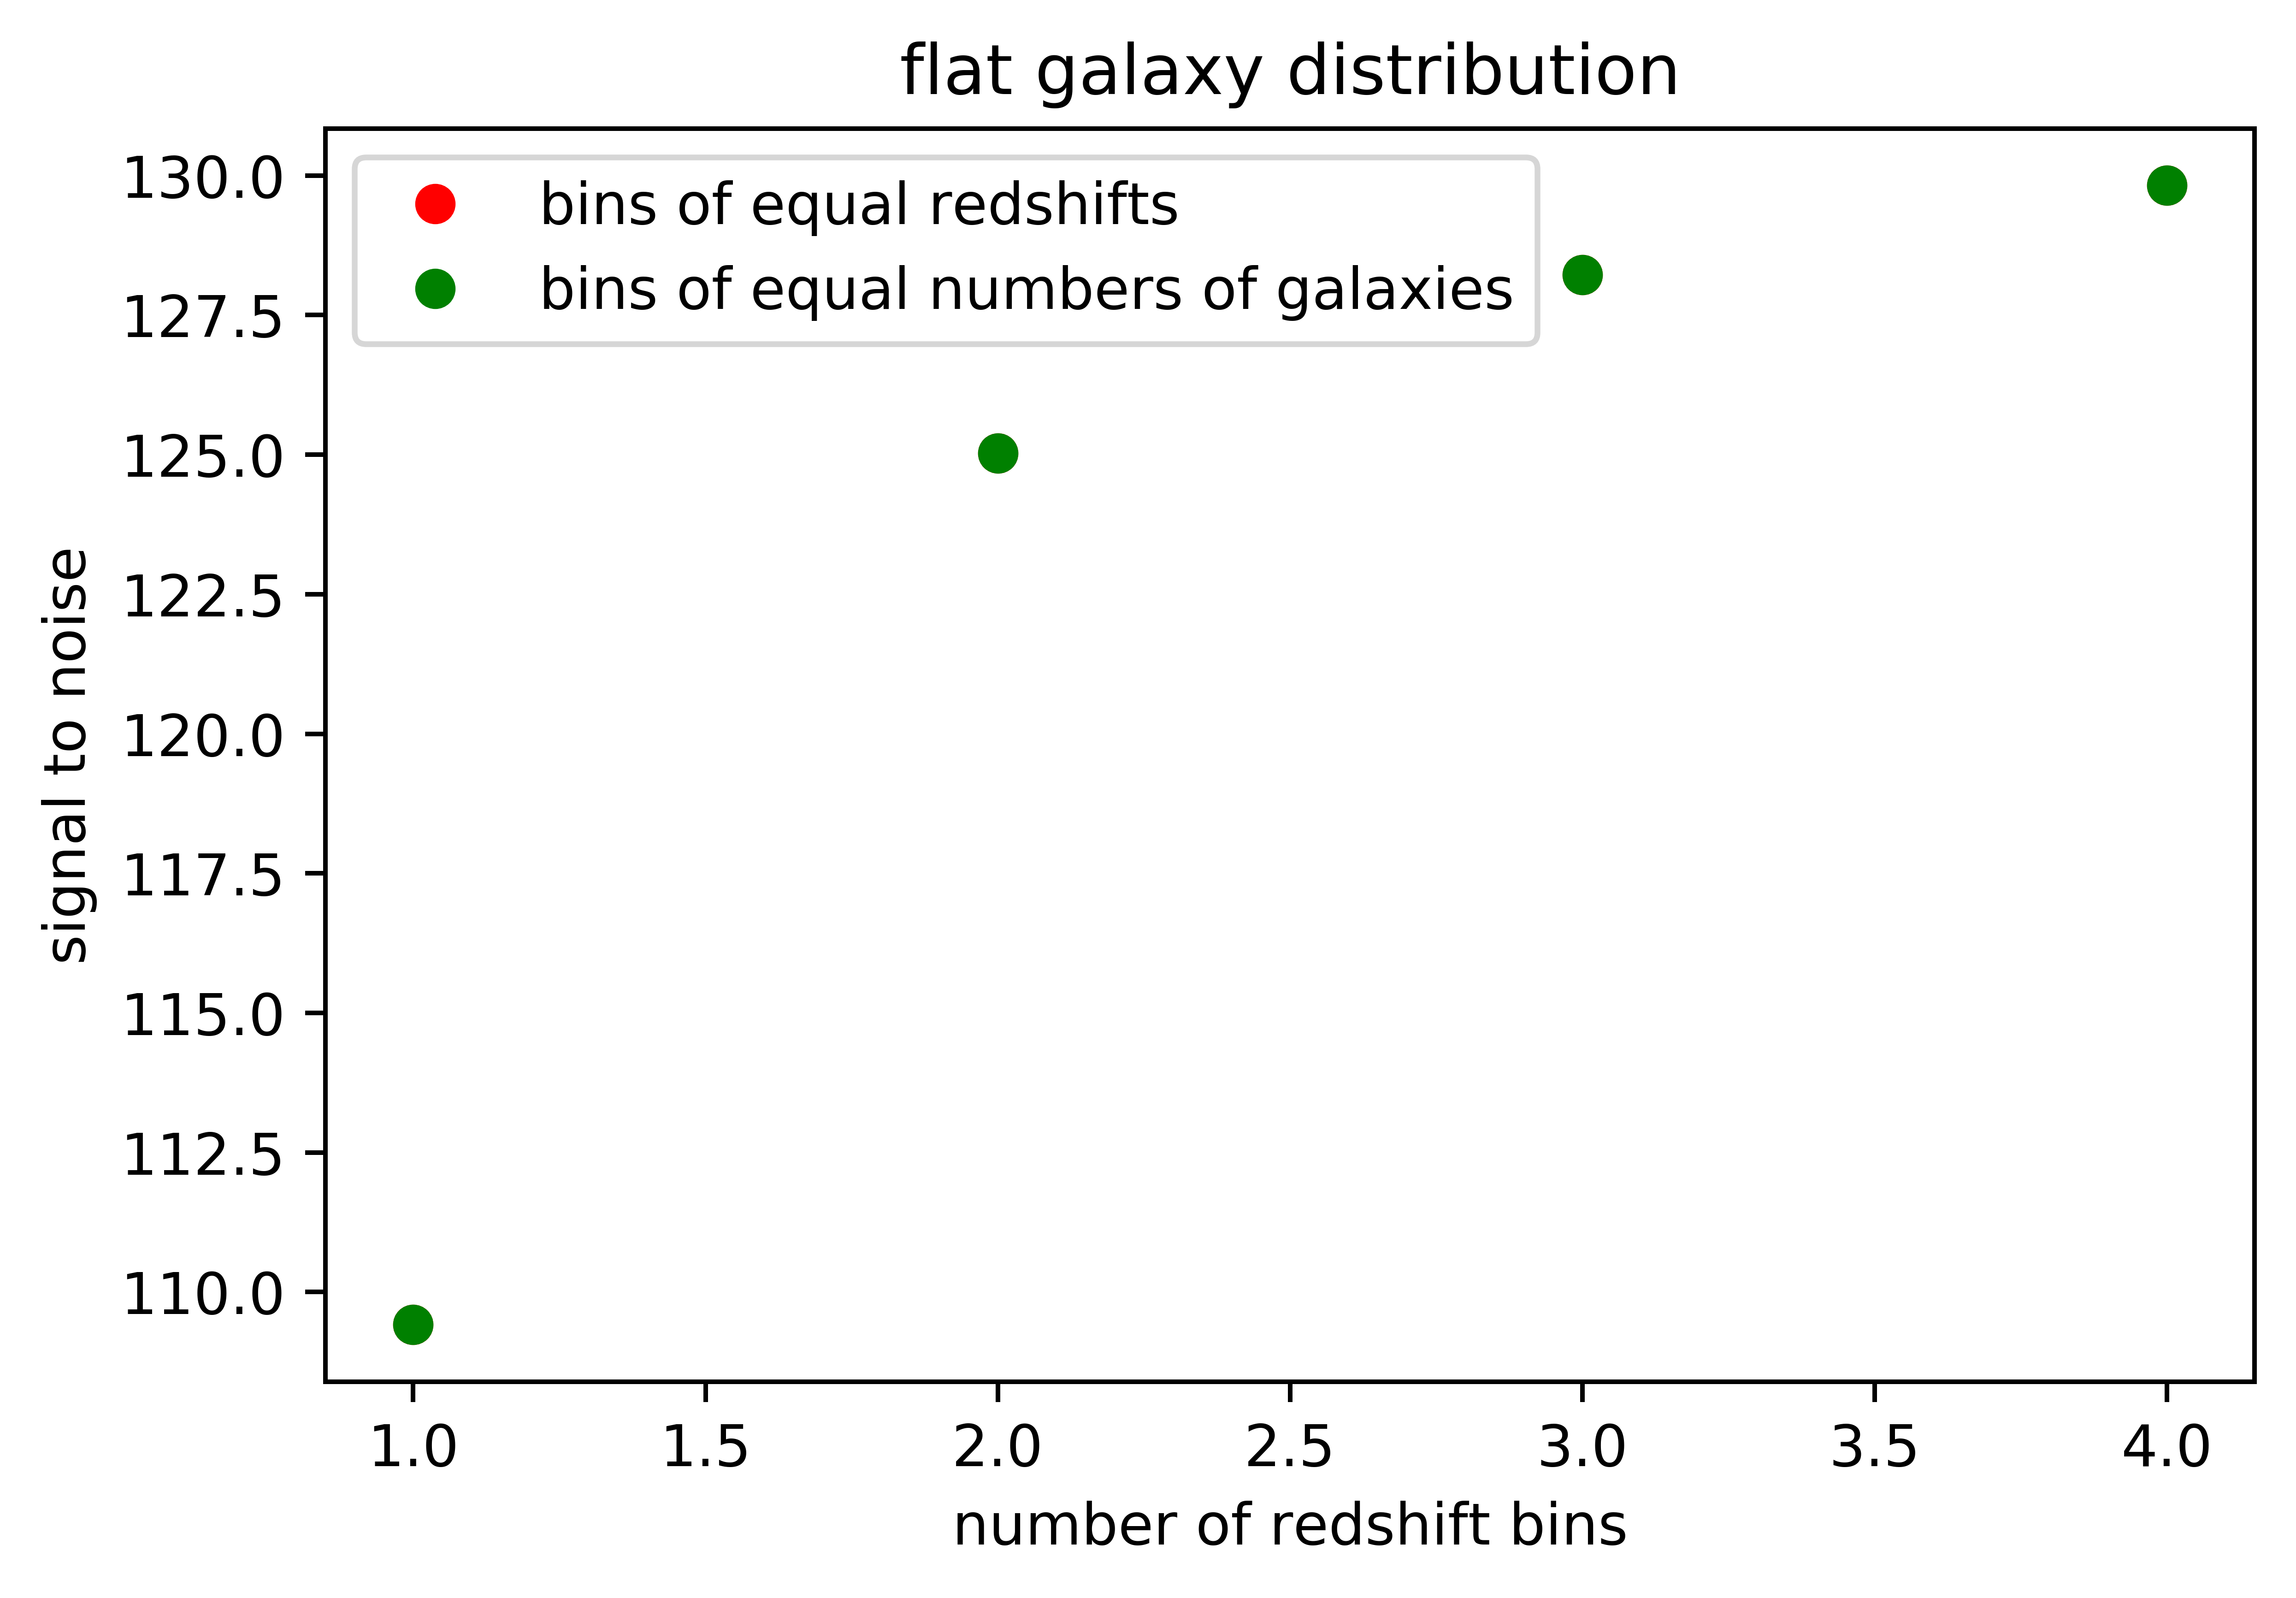

In [16]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [stn_f["z_1"], stn_f["z_2"], stn_f["z_3"], stn_f["z_4"]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [stn_f["n_1"], stn_f["n_2"], stn_f["n_3"], stn_f["n_4"]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("signal to noise")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

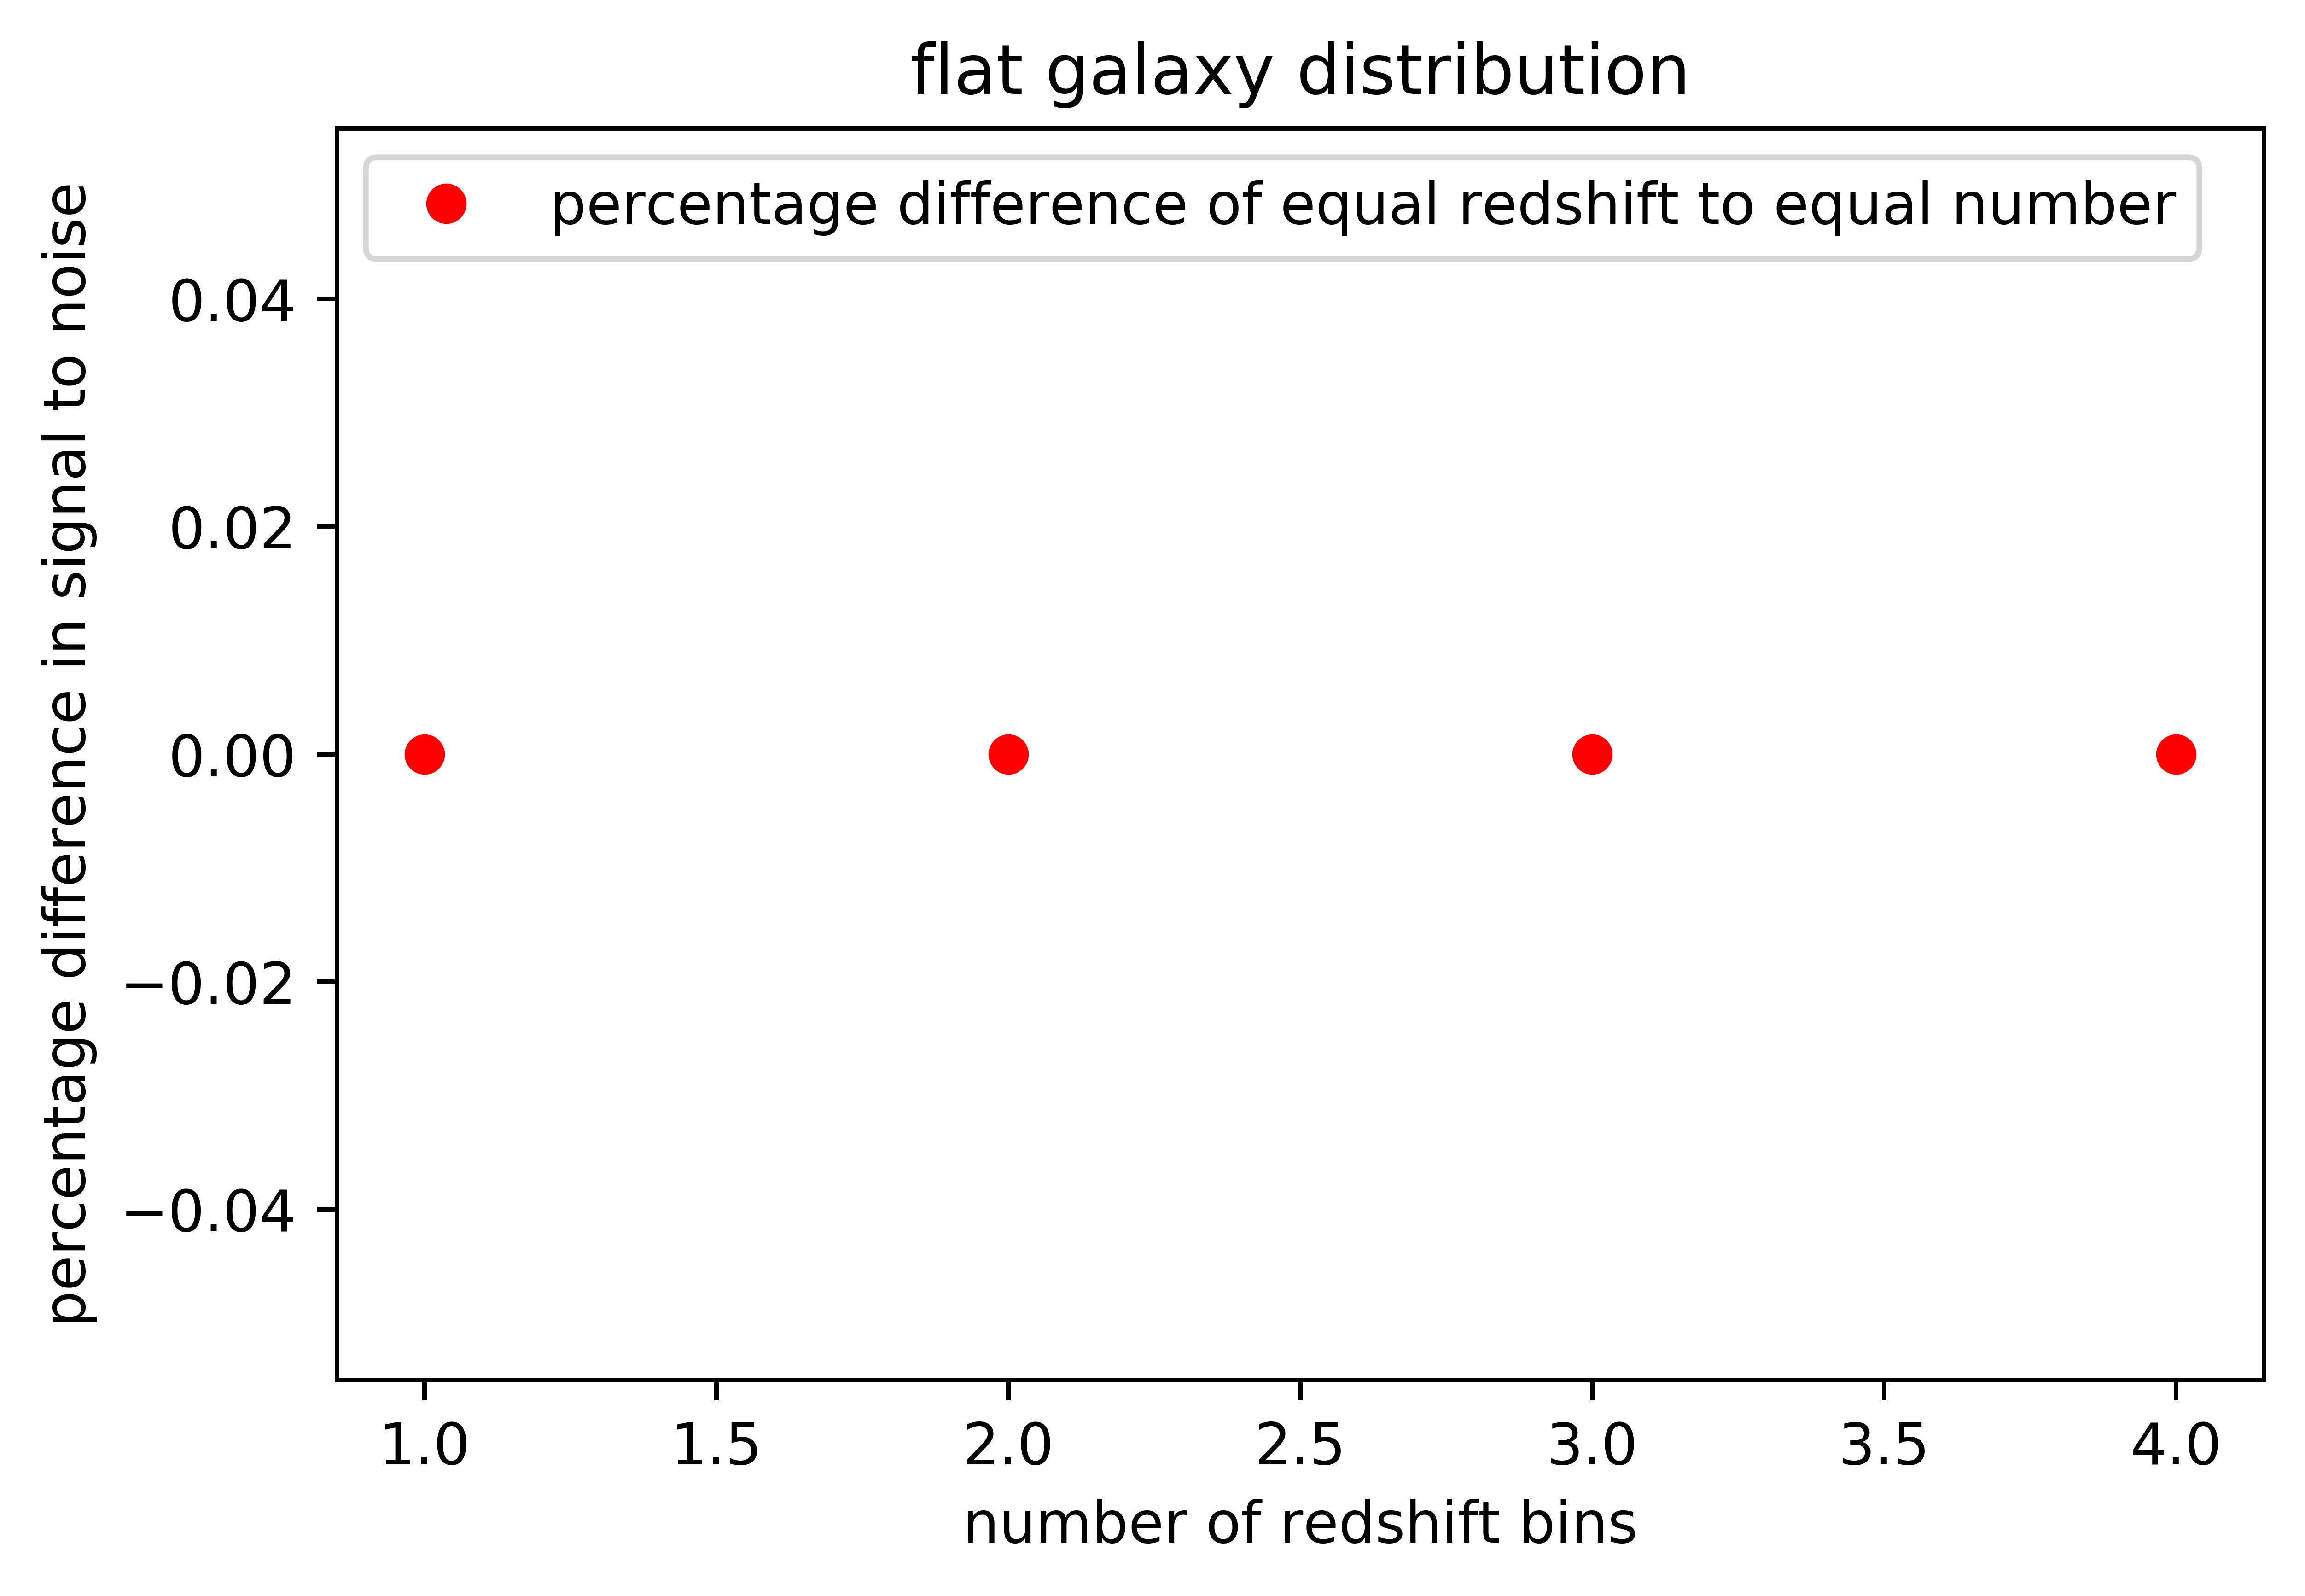

In [41]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [stn_f["z_1"]/stn_f["n_1"]-1, stn_f["z_2"]/stn_f["n_2"]-1, stn_f["z_3"]/stn_f["n_3"]-1, stn_f["z_4"]/stn_f["n_4"]-1],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "percentage difference of equal redshift to equal number")
plt.xlabel("number of redshift bins")
plt.ylabel("percentage difference in signal to noise")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

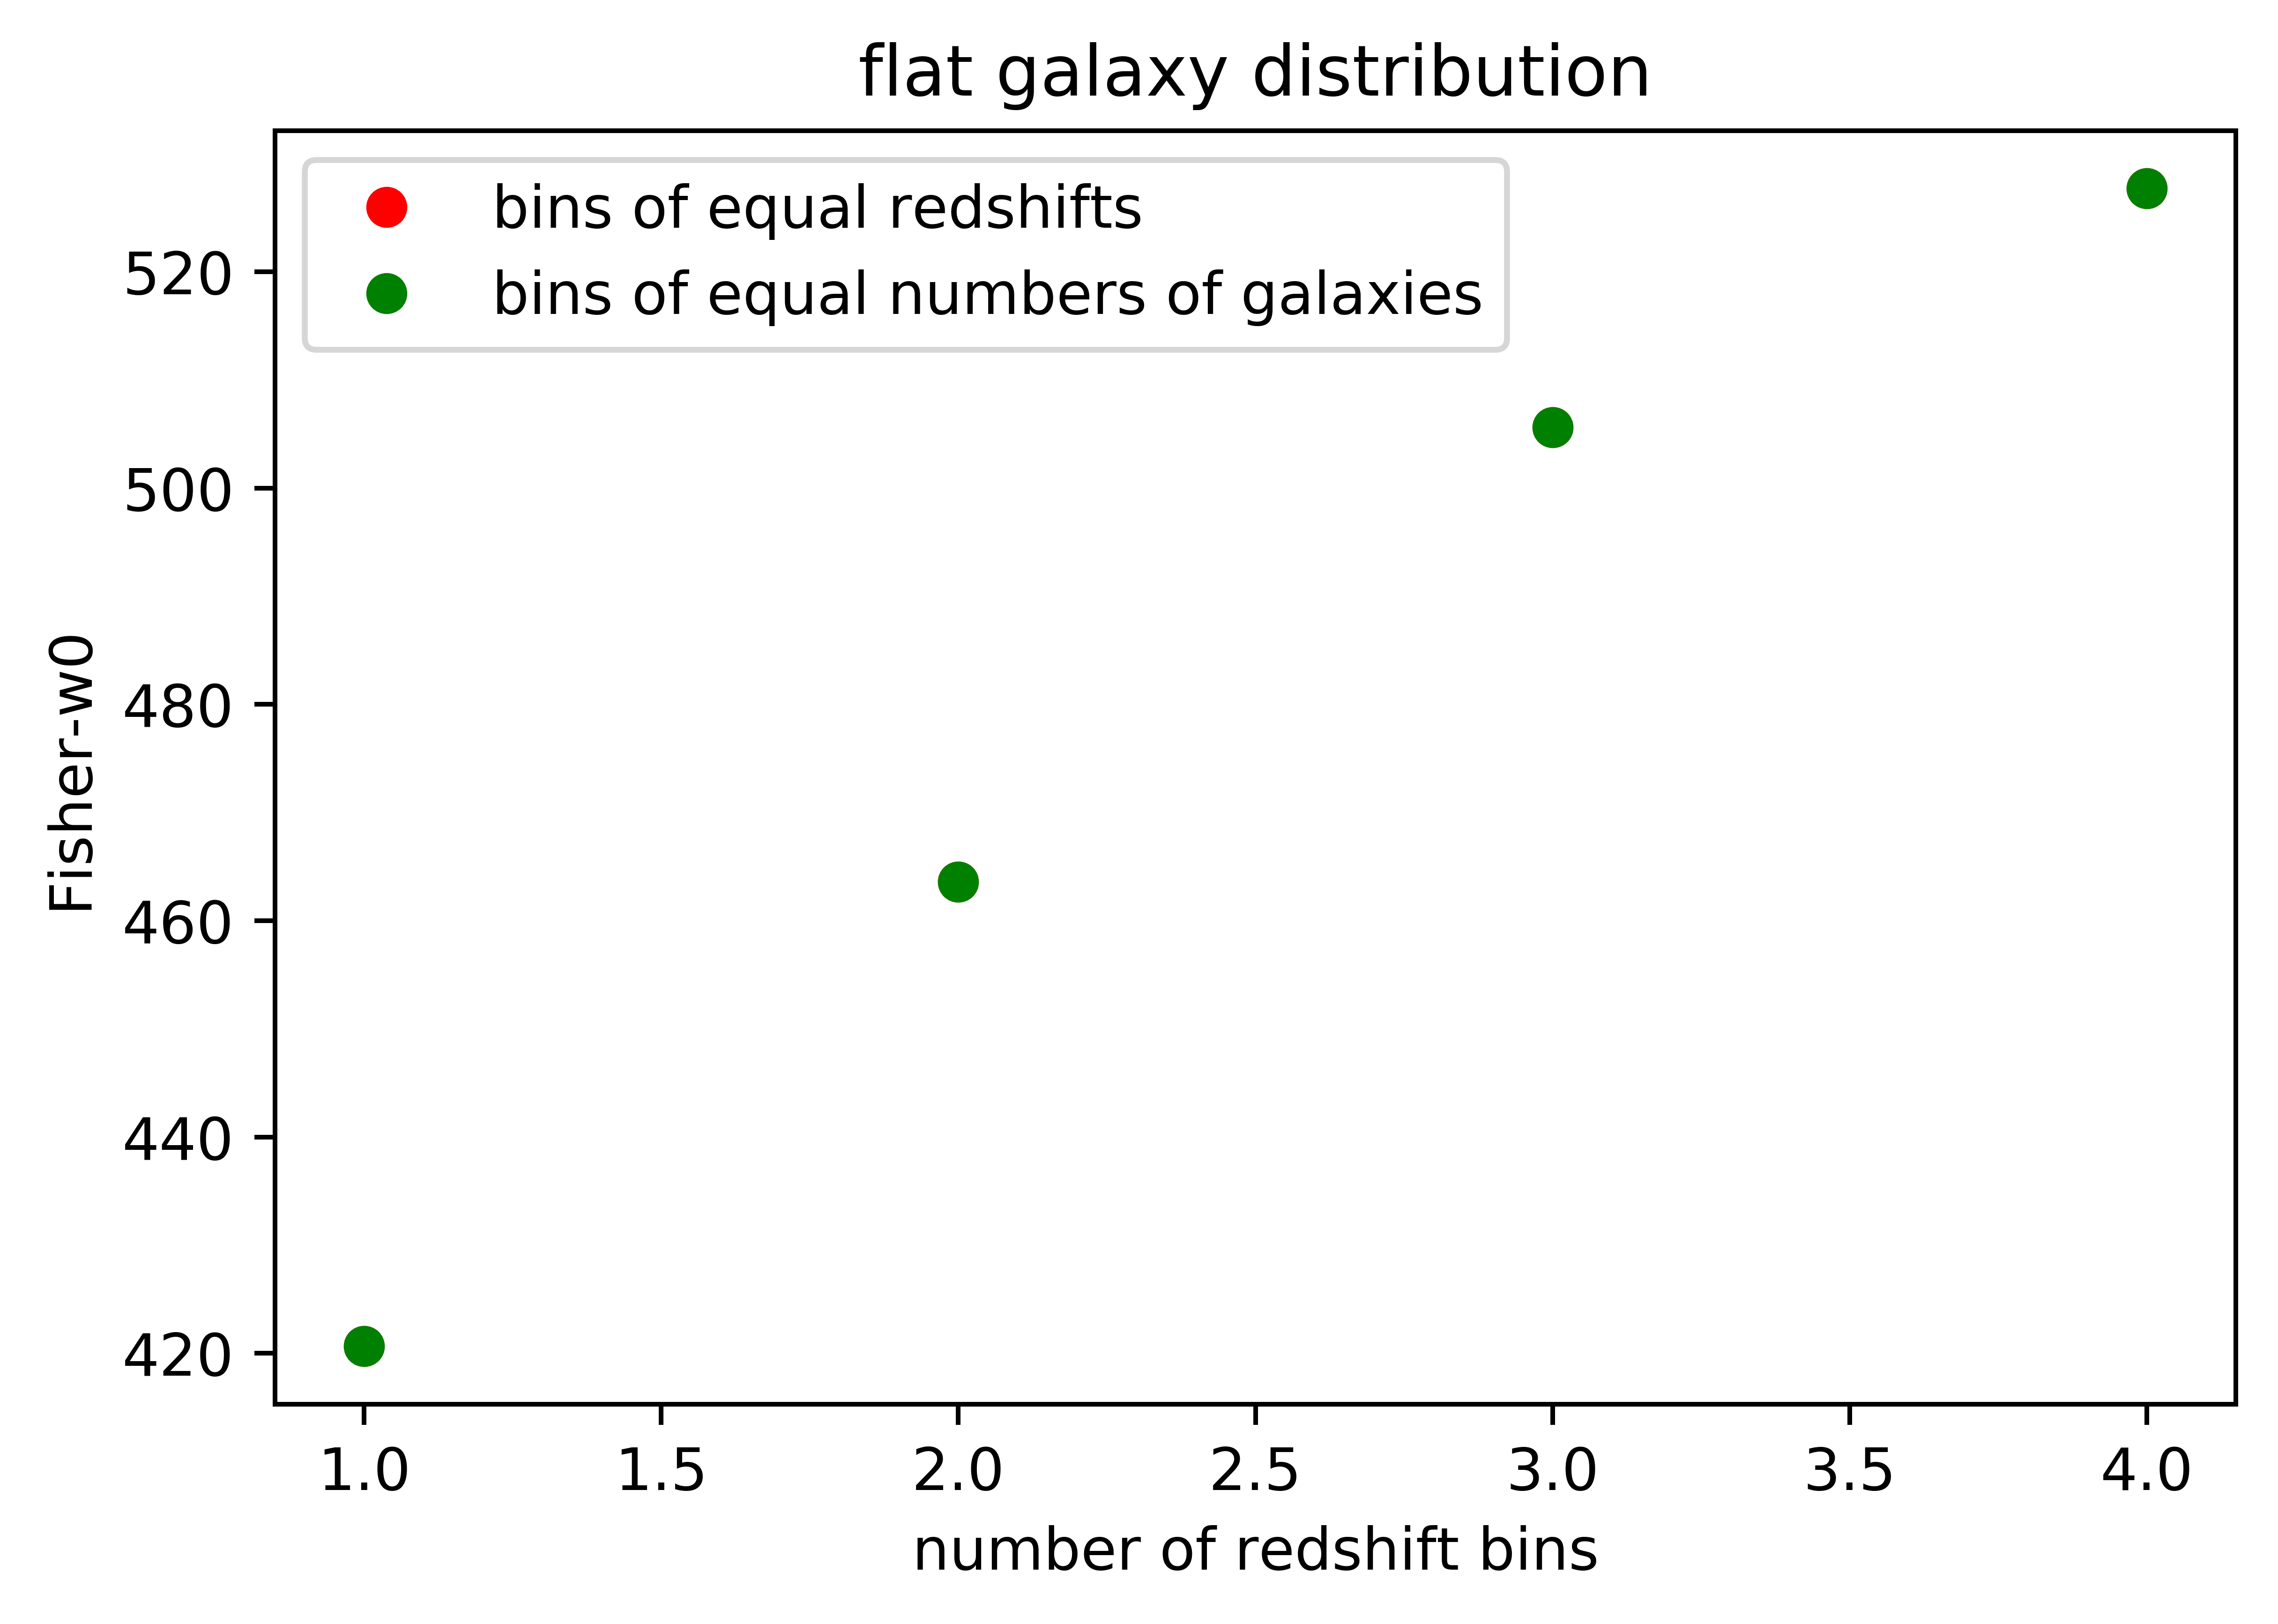

In [18]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [fisher_f["z_1"][3,3], fisher_f["z_2"][3,3], fisher_f["z_3"][3,3], fisher_f["z_4"][3,3]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [fisher_f["n_1"][3,3], fisher_f["n_2"][3,3], fisher_f["n_3"][3,3], fisher_f["n_4"][3,3]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("Fisher-w0")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

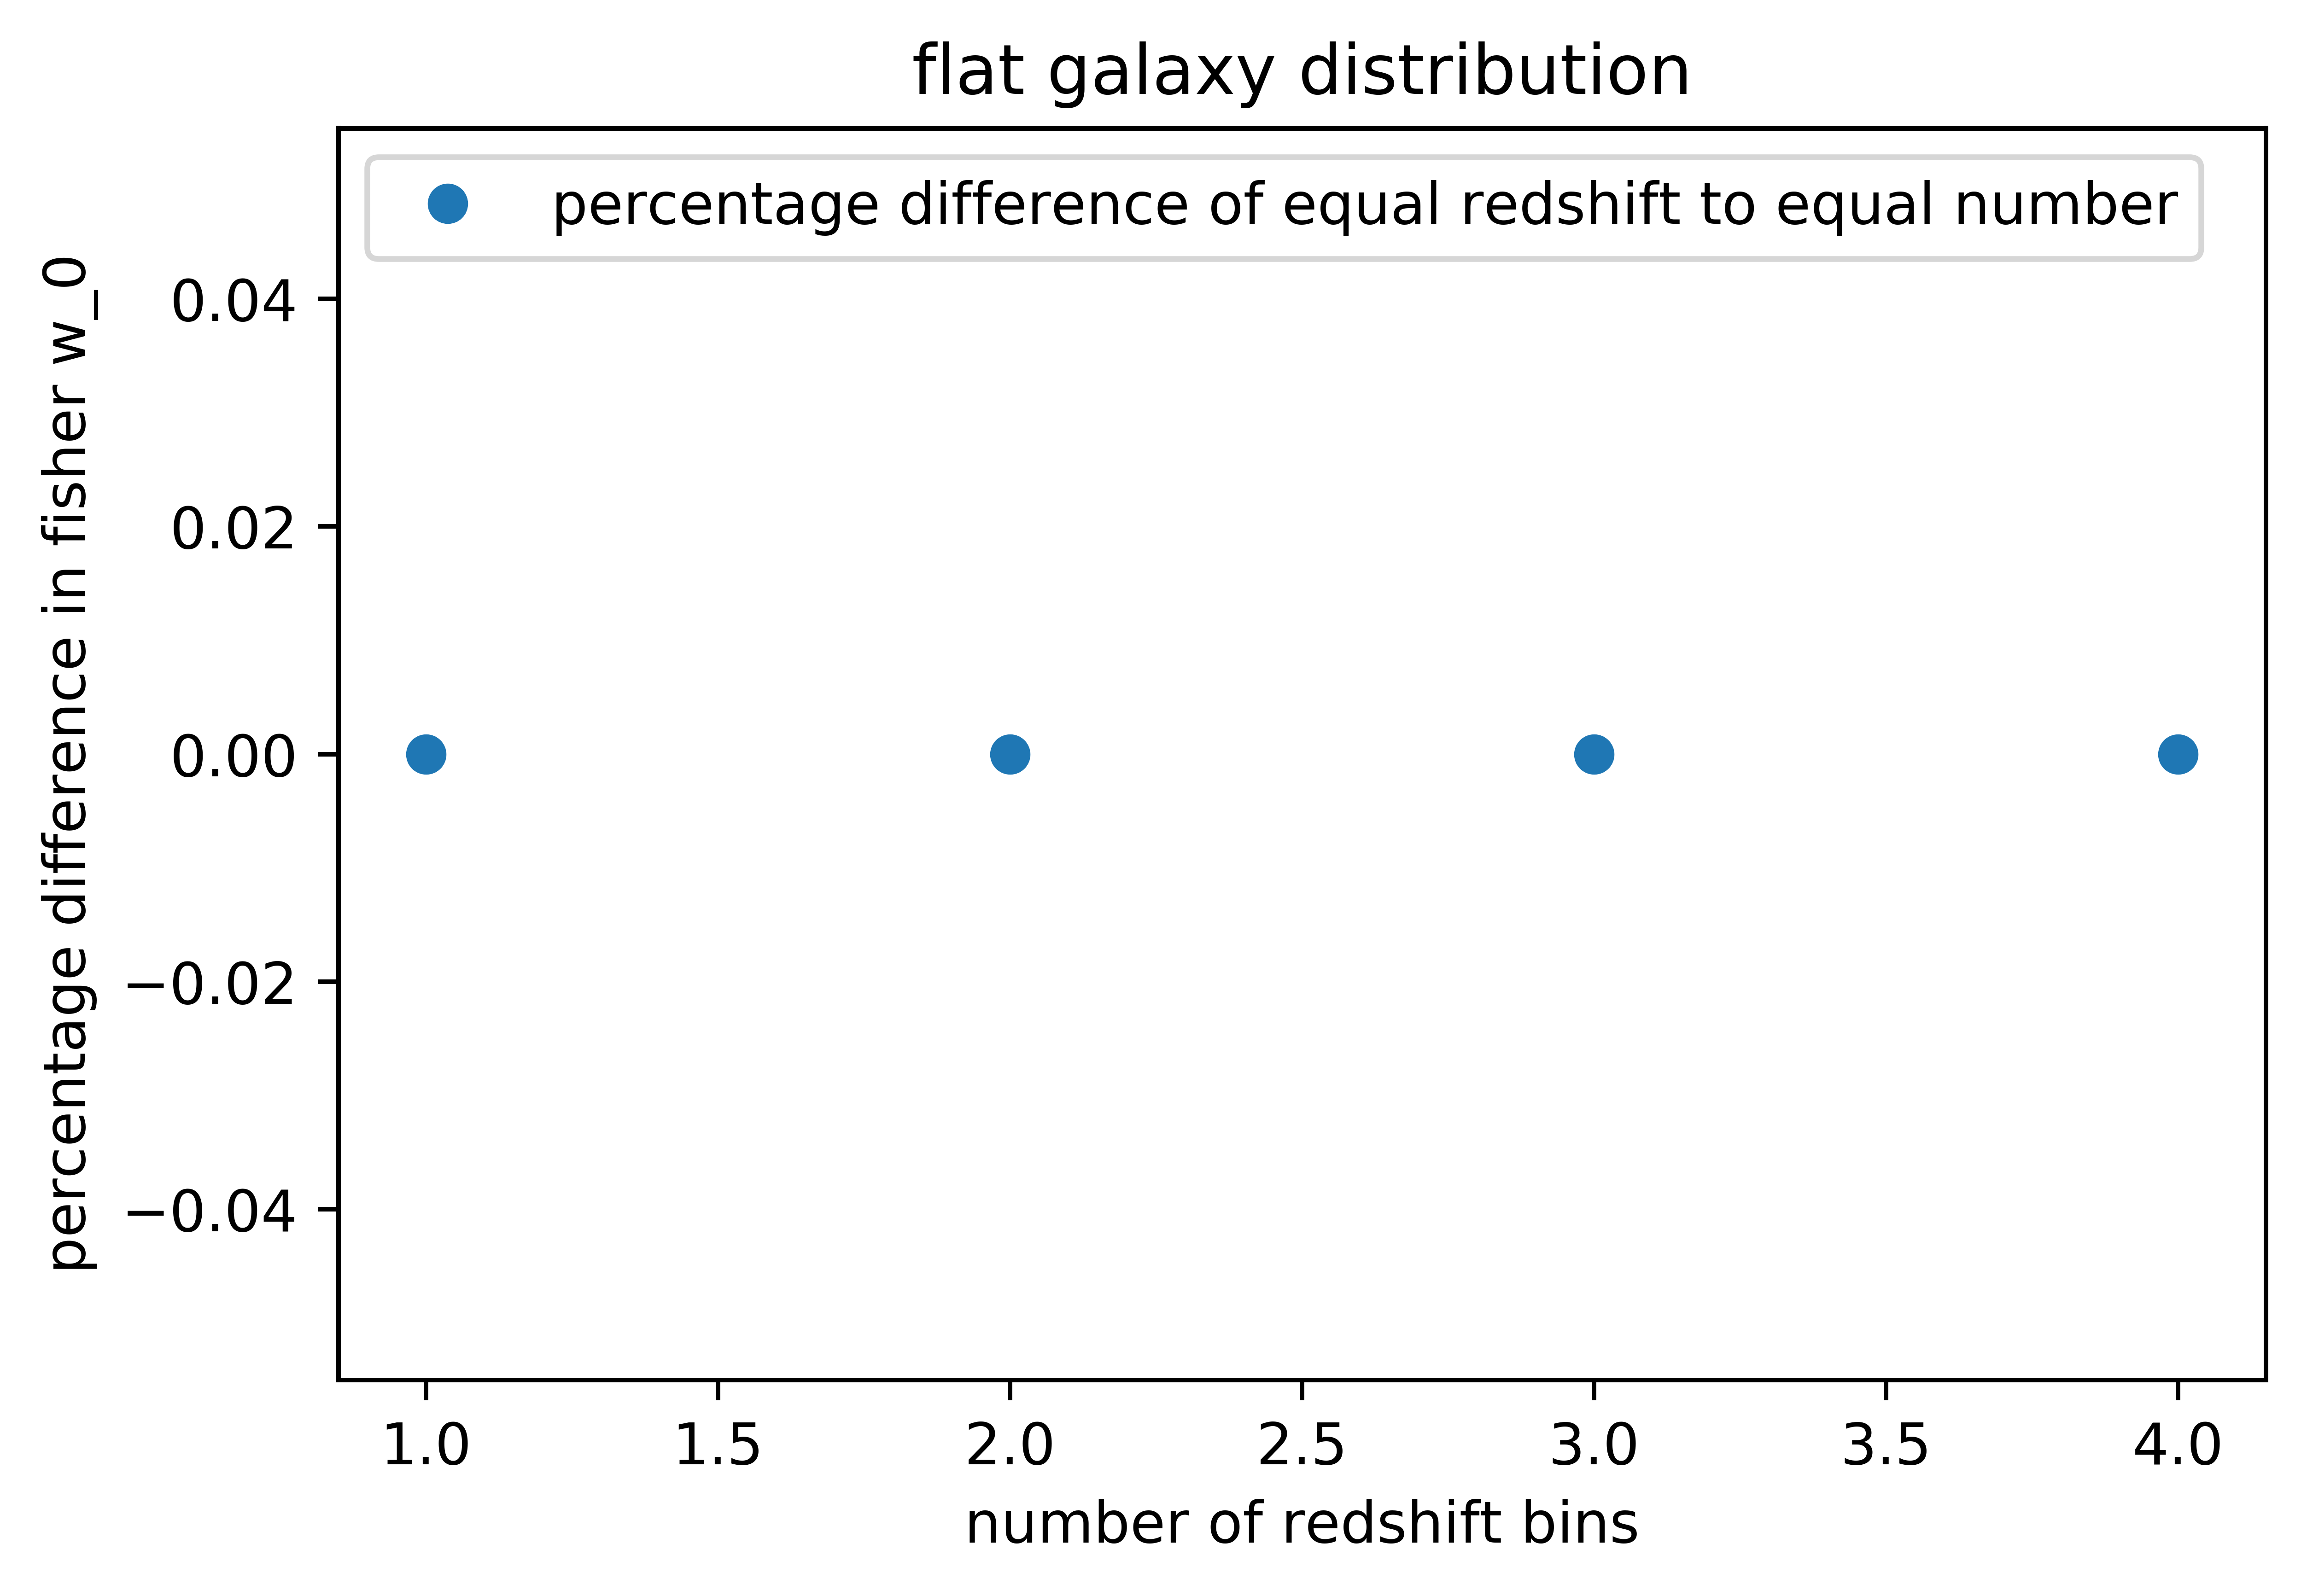

In [44]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [fisher_f["z_1"][3,3]/fisher_f["n_1"][3,3]-1, fisher_f["z_2"][3,3]/fisher_f["n_2"][3,3]-1, fisher_f["z_3"][3,3]/fisher_f["n_3"][3,3]-1, fisher_f["z_4"][3,3]/fisher_f["n_4"][3,3]-1],
        linestyle='None', marker ="o", label = "percentage difference of equal redshift to equal number")
plt.xlabel("number of redshift bins")
plt.ylabel("percentage difference in fisher w_0 ")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

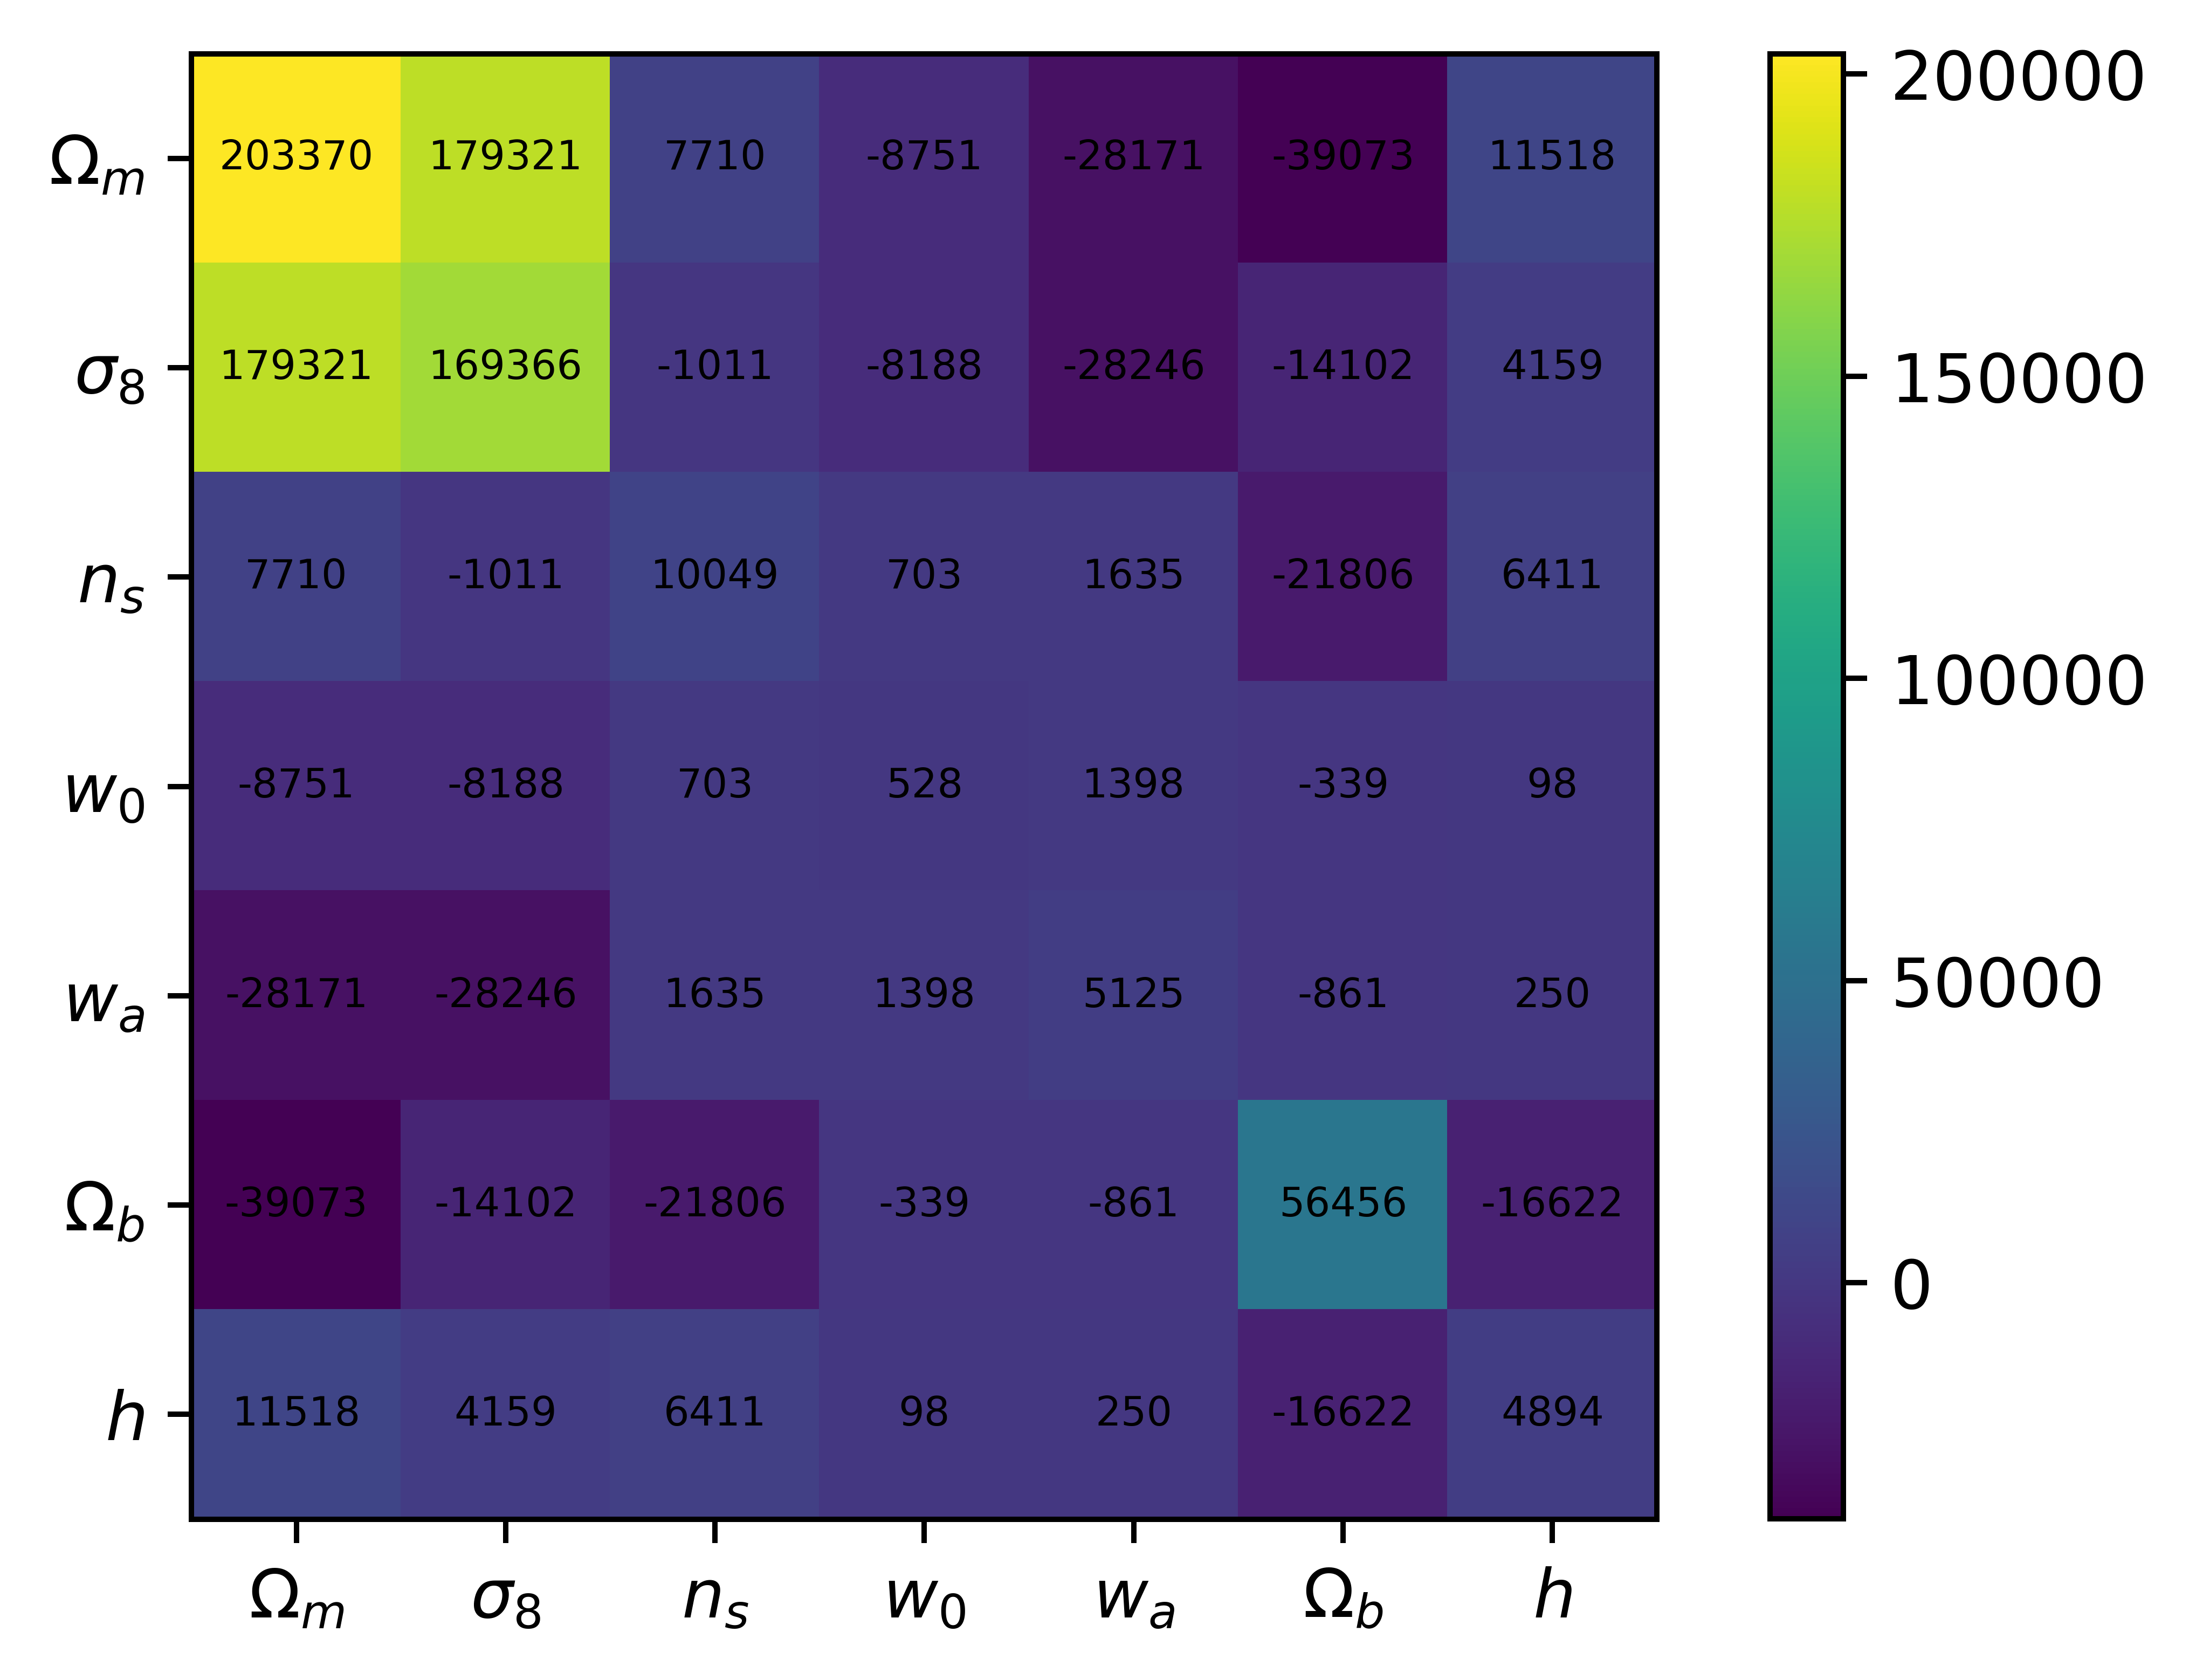

In [19]:
plt.imshow(fisher_f["n_4"])
plt.colorbar()
param_labels = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$w_0$', r'$w_a$', r'$\Omega_b$', r'$h$']
plt.xticks(np.arange(7), param_labels)
plt.yticks(np.arange(7), param_labels)
for i in range(7):
    for j in range(7):
        c = fisher_f['n_4'][j,i]
        plt.text(i, j, "%.0f"%(c), va='center', ha='center', fontsize=6)

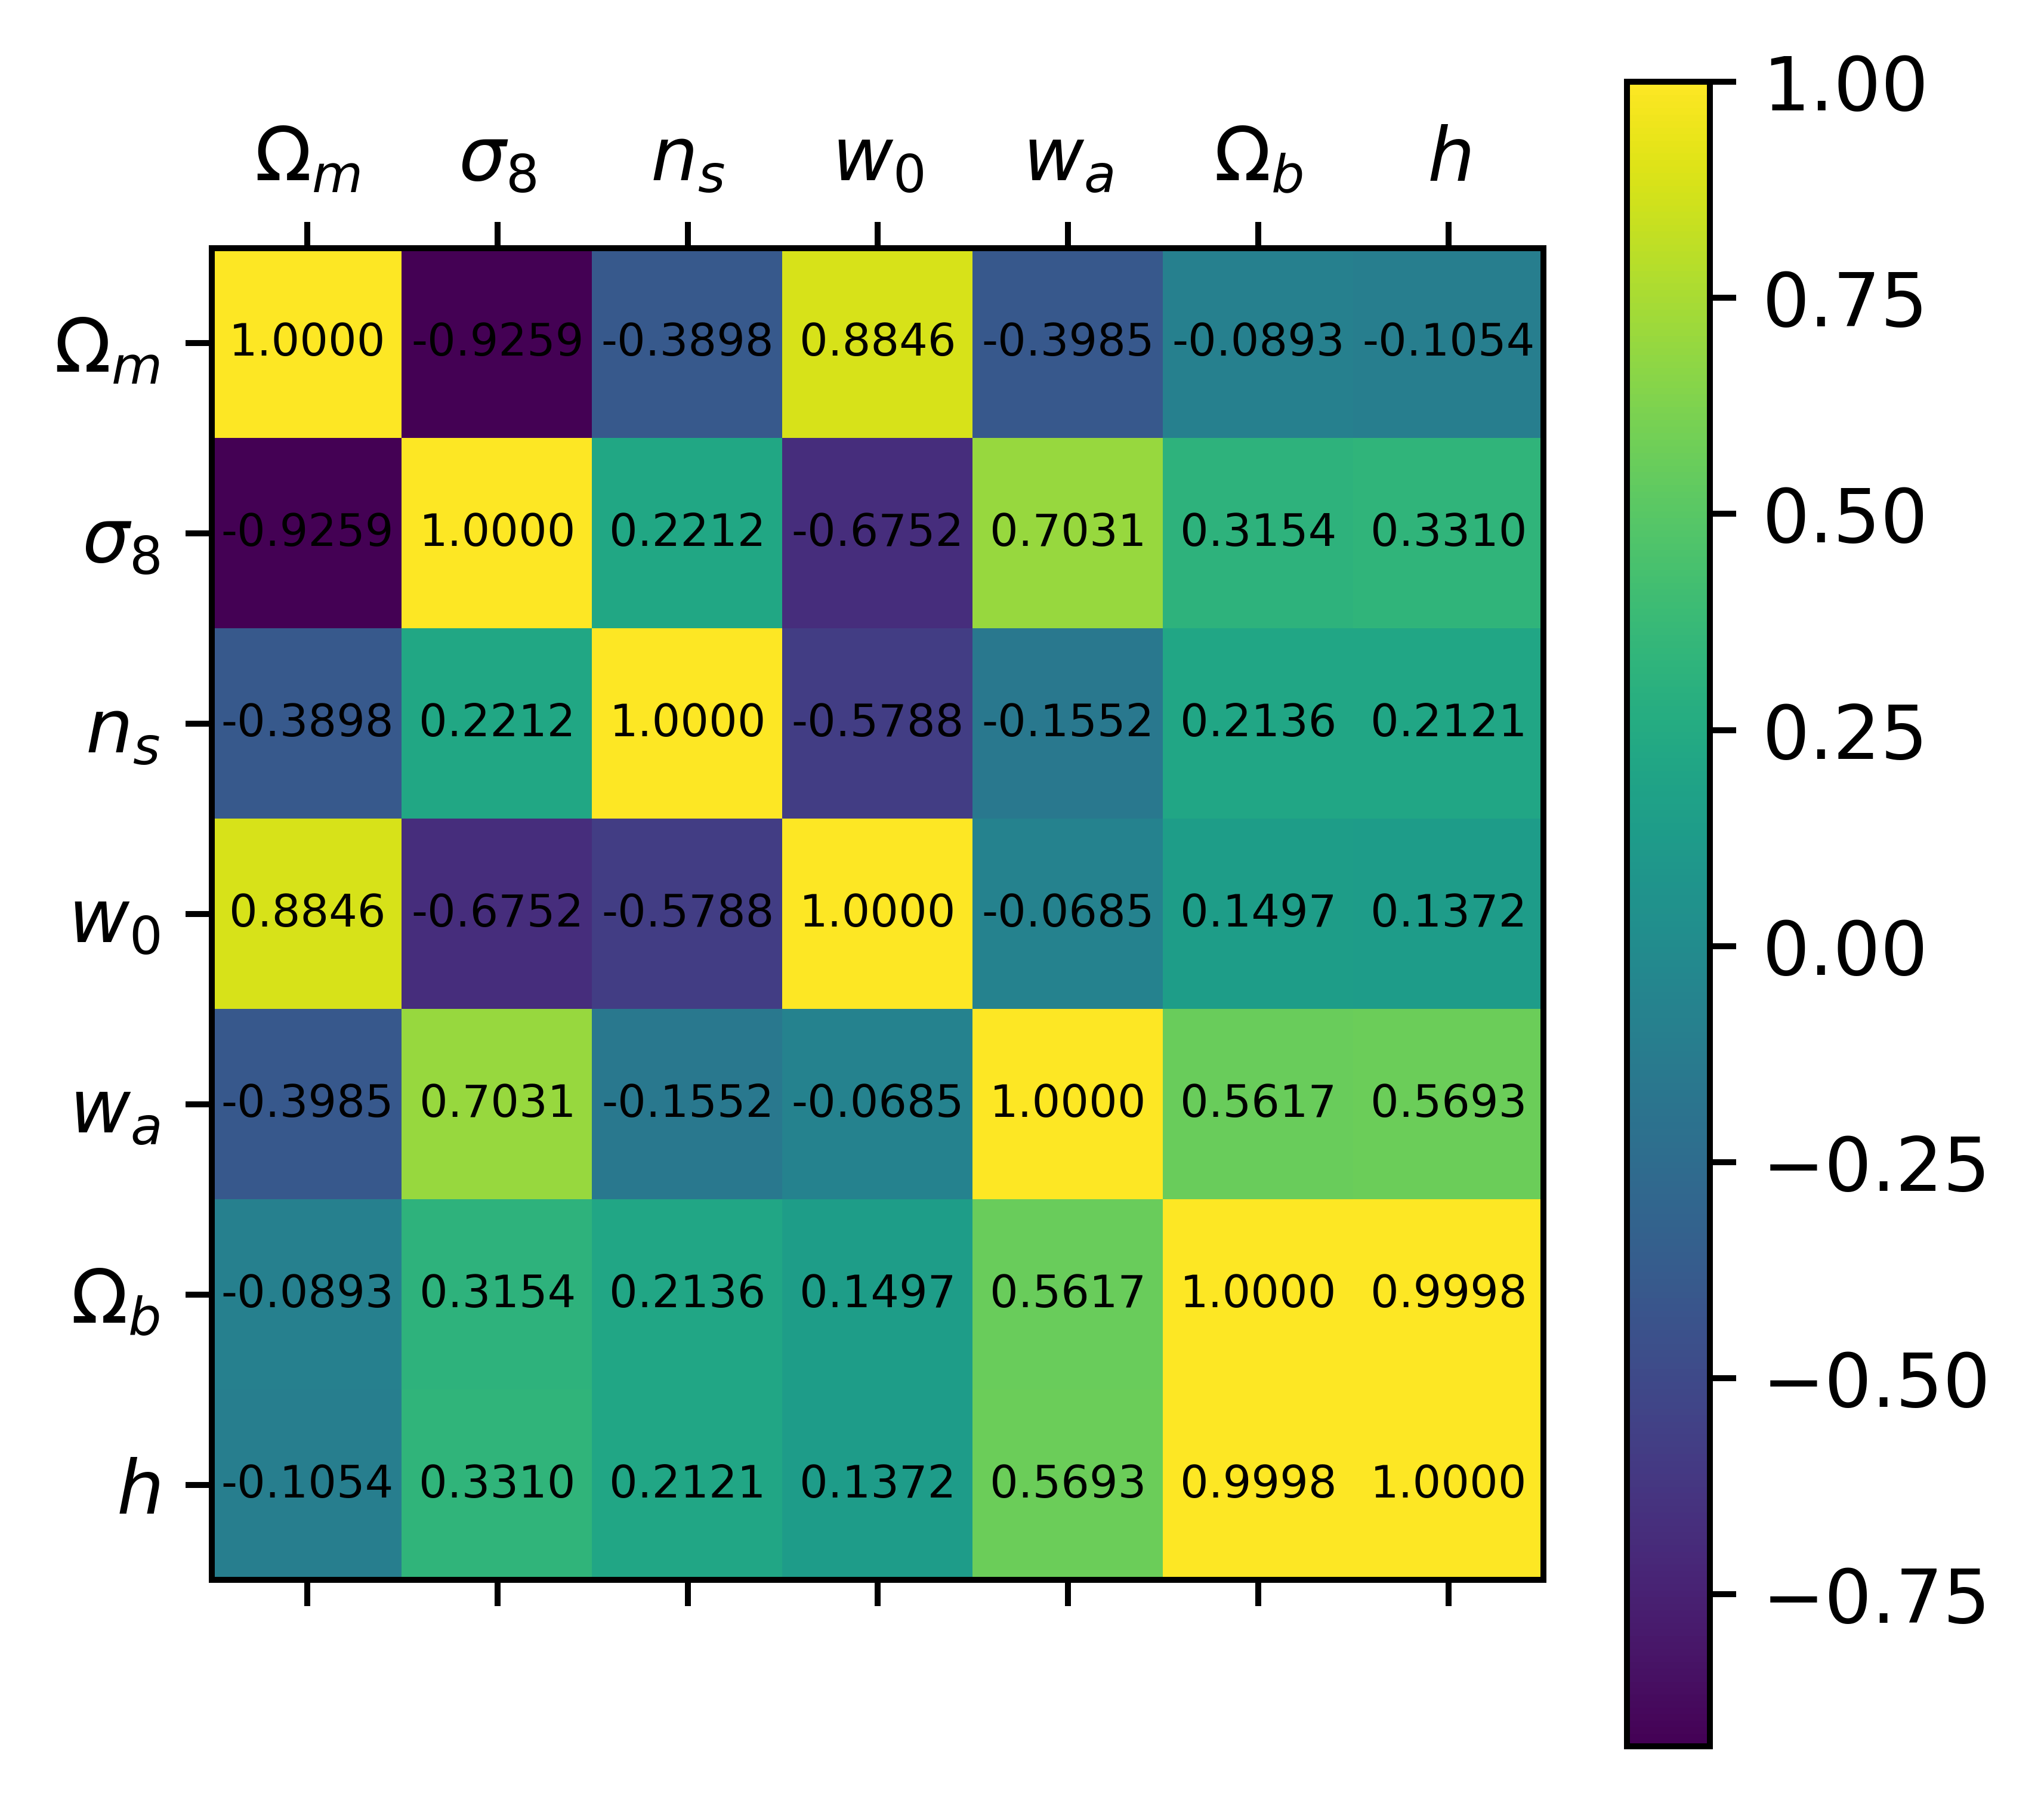

In [20]:
covar_p_f ={}
cor_p_f = {}

covar_p_f["n_4"] = cov_cosmo_para(fisher_f["n_4"])
cor_p_f["n_4"] = corr_cosmo_para(covar_p_f["n_4"])

plot_corr(cor_p_f["n_4"])

Omega_m = 0.315 +- 0.3593166705494736

w_0 = -1 +- 0.028819287166697807

Figure of Merit for Omega_m and w_0 is 24.142342527628042



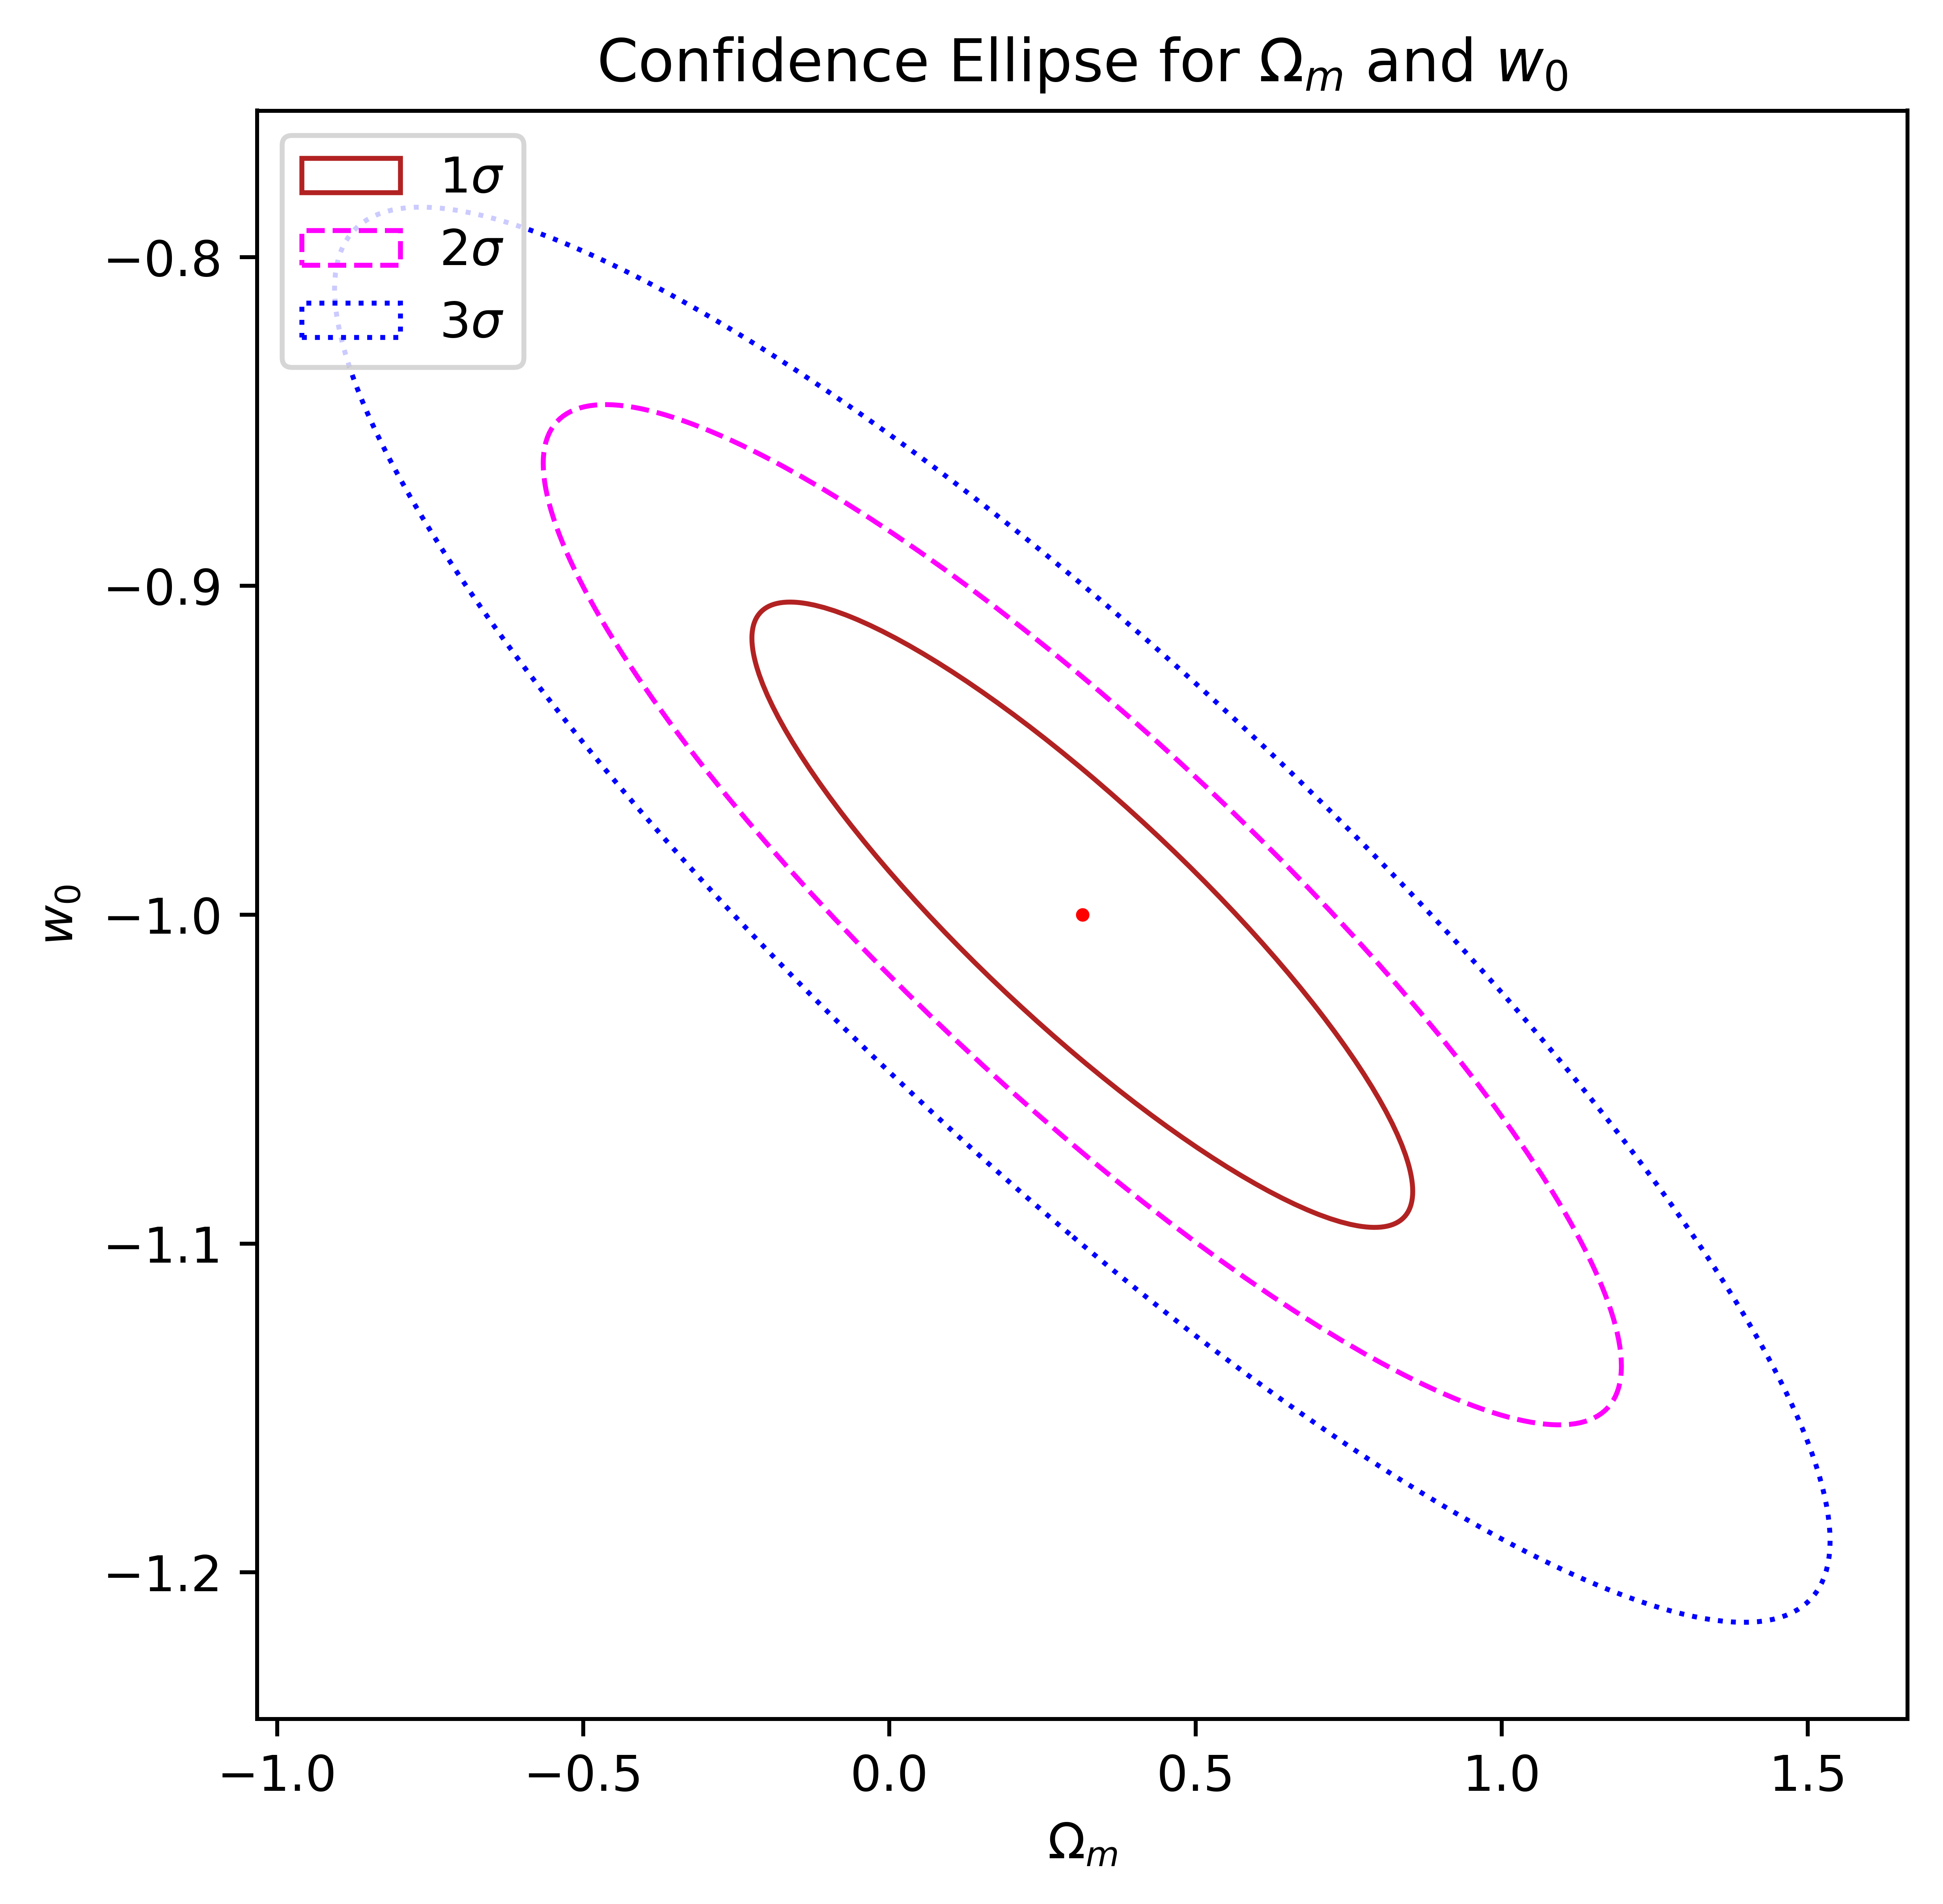

24.142342527628042

In [21]:
#try 'omega_m' and 'w_0'
plotConfidenceEllipse(covar_p_f["n_4"], "Omega_m", "w_0")

w_0 = -1 +- 0.3550929981751972

w_a = 0 +- 0.11123661468668034

Figure of Merit for w_0 and w_a is 6.329219194836554



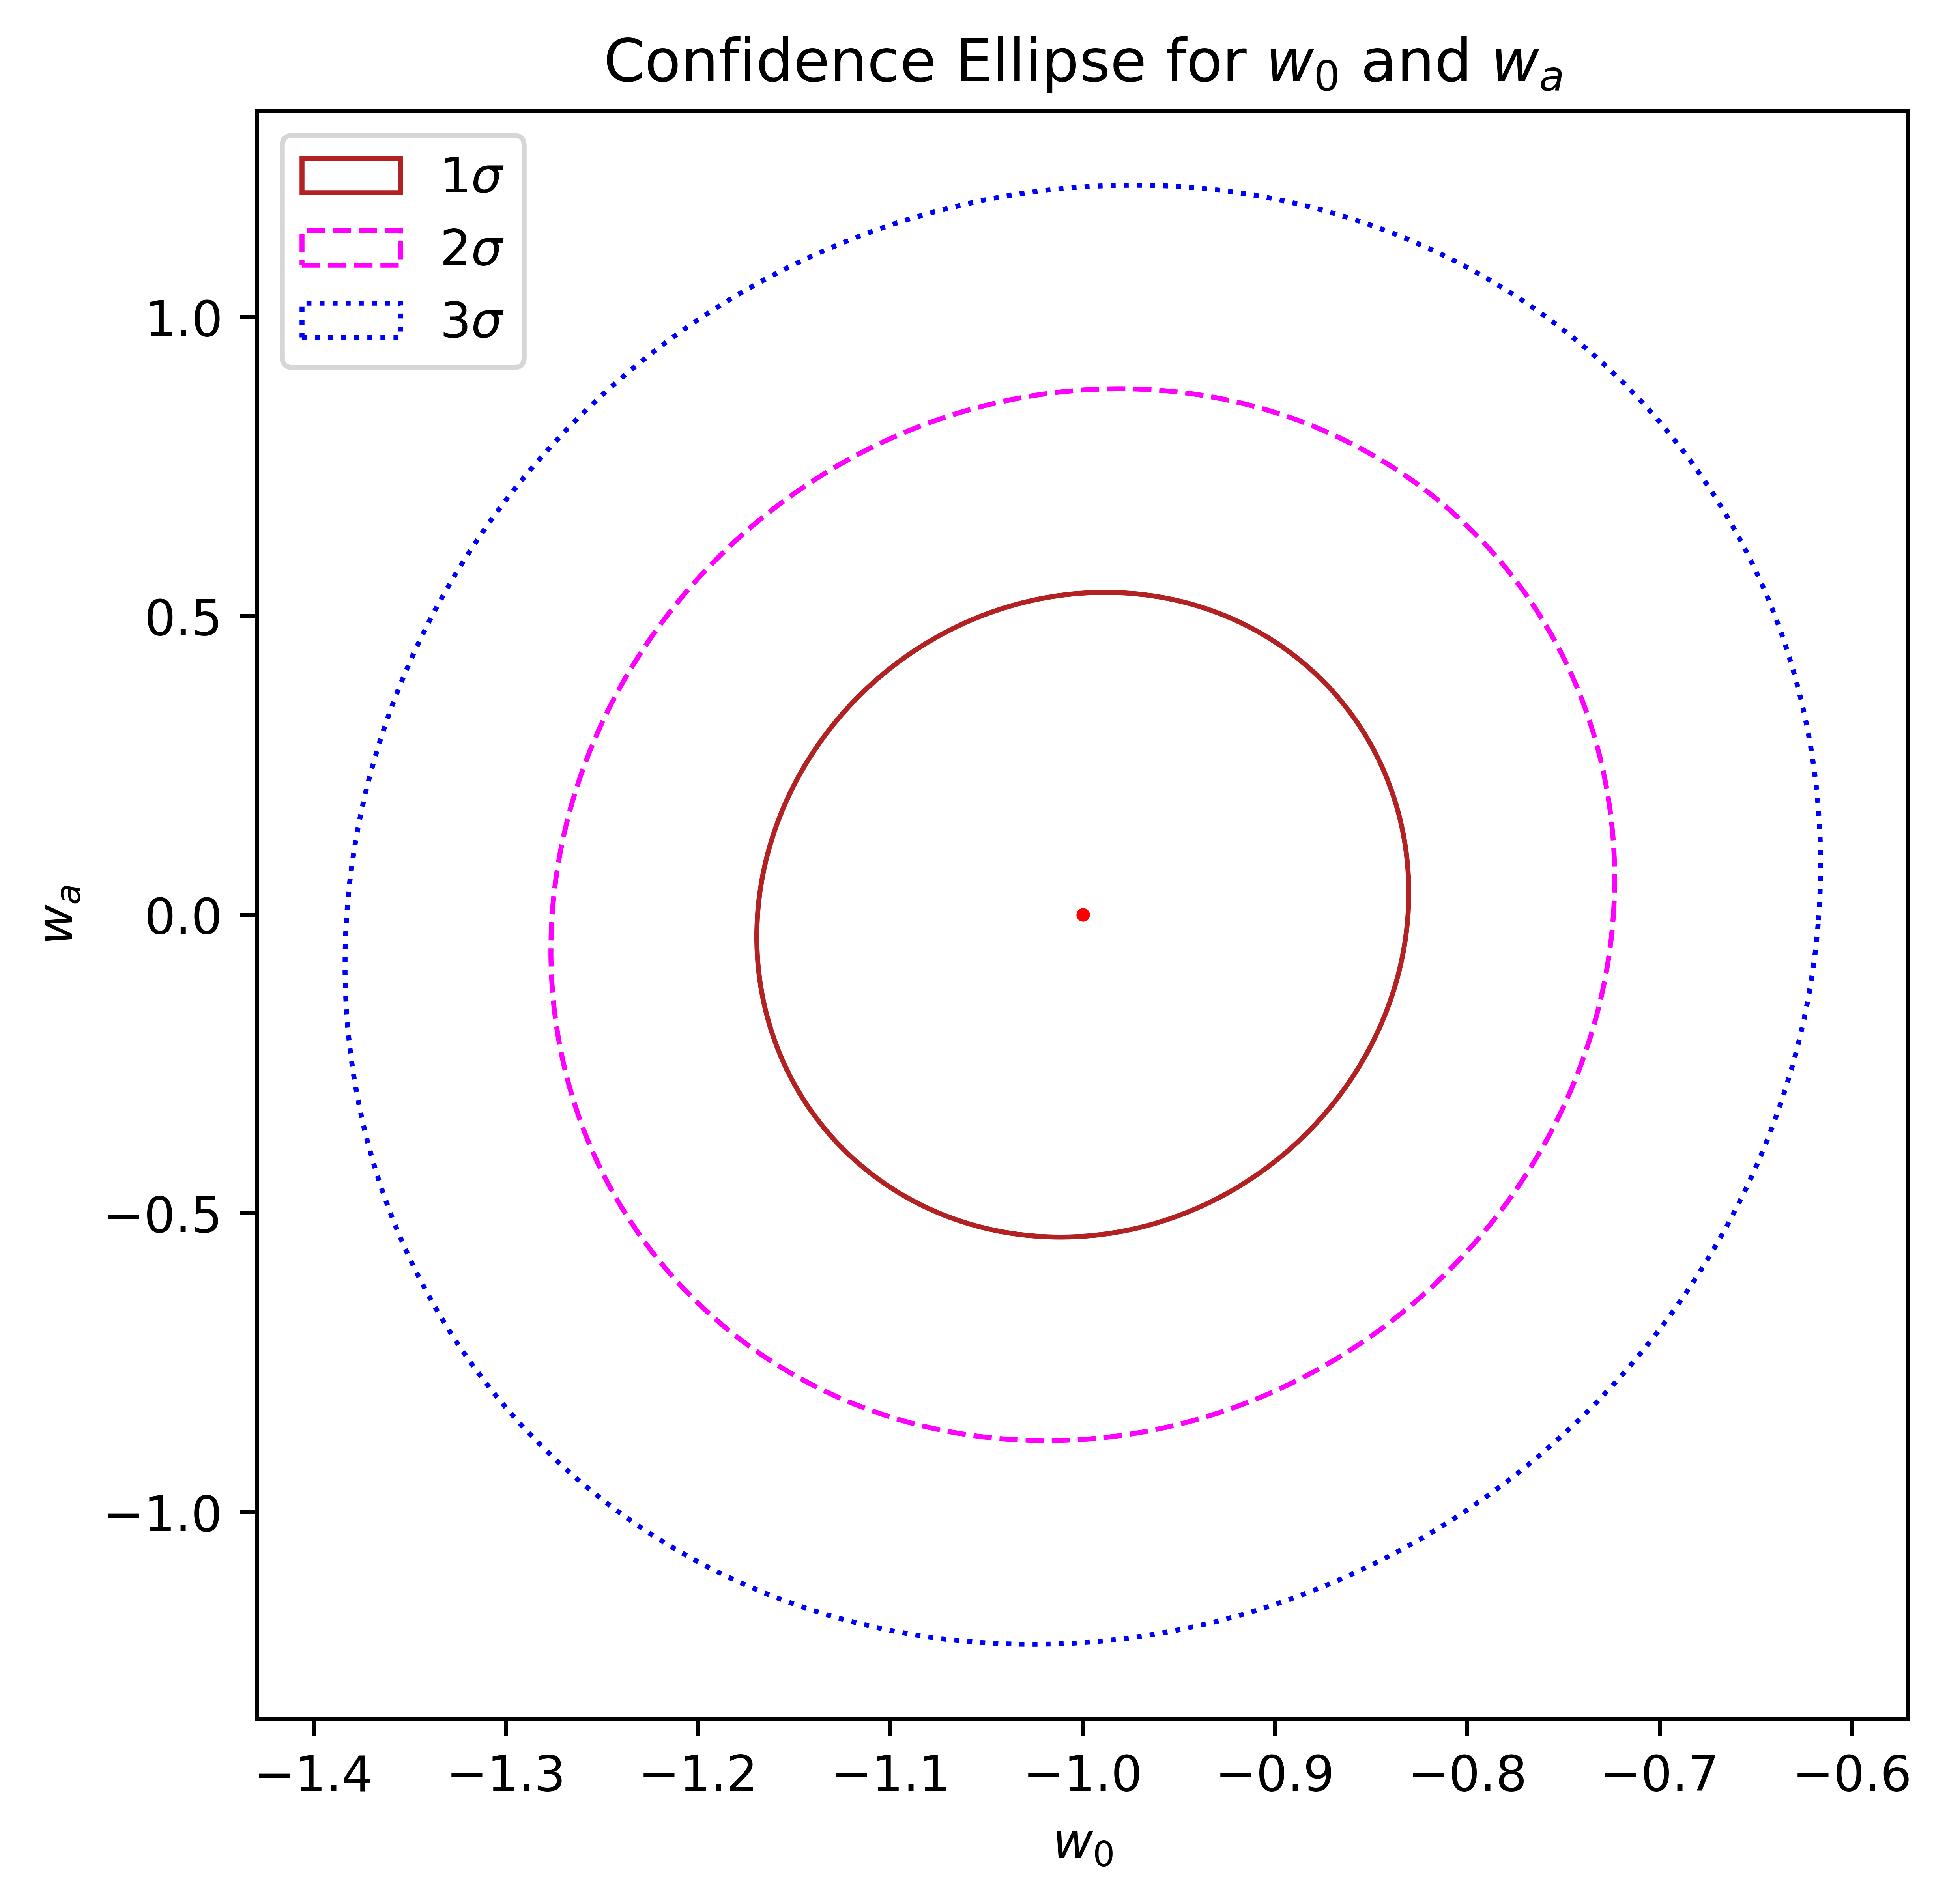

6.329219194836554

In [22]:
plotConfidenceEllipse(covar_p_f["n_4"], "w_0", "w_a")

Omega_m = 0.315 +- 1.4759328754898762

Omega_b = 0.045 +- 0.06230170361206575

Figure of Merit for Omega_m and Omega_b is 2.718776327023718



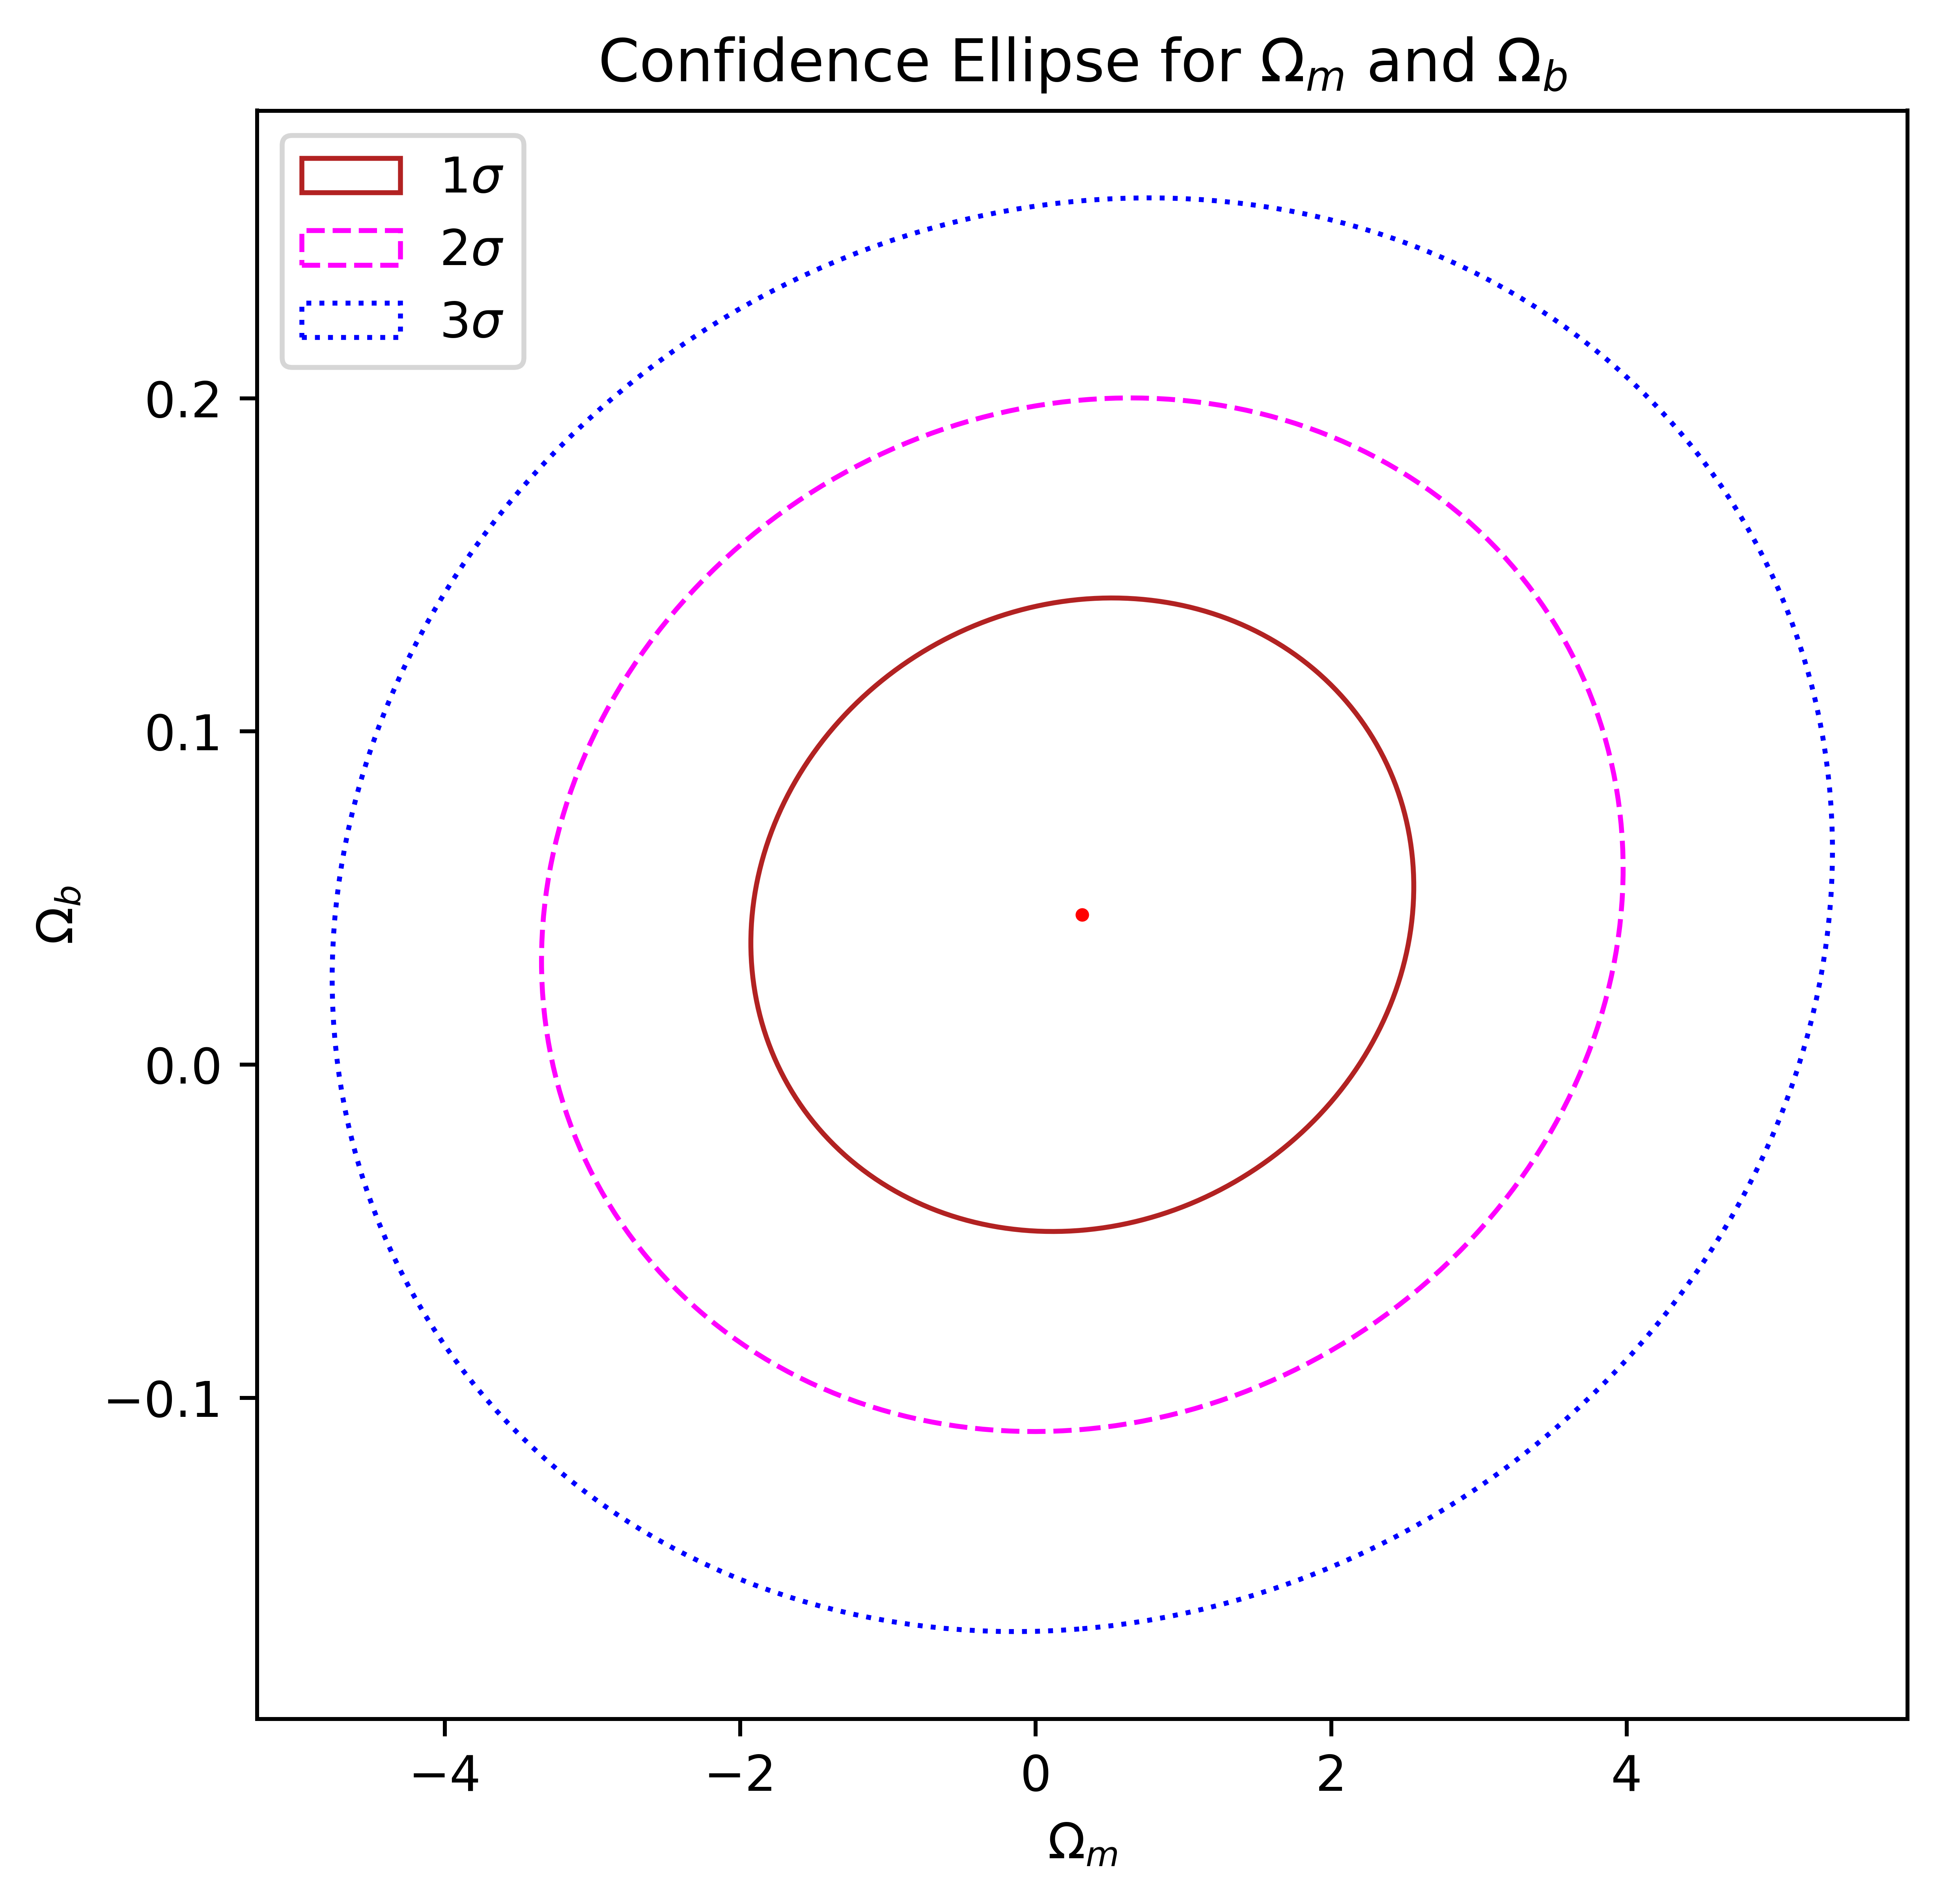

2.718776327023718

In [23]:
plotConfidenceEllipse(covar_p_f["n_4"], "Omega_m", "Omega_b")

That's impossible....

let's compare
1. fixing parameter: take the 2*2 submatrix of the fisher matrix, and then take its inverse
2. marginalize over: take the inverse of fisher matrix, and then take the 2*2 submatrix
both for w_0 and w_a
the order of calculation in papers follows 2

In [24]:
print(1)
np.linalg.inv(subcov(fisher_f["n_4"], 'w_0', 'w_a'))

1


array([[ 0.00684015, -0.00186624],
       [-0.00186624,  0.00070429]])

In [25]:
print(2)
subcov(np.linalg.inv(fisher_f["n_4"]), 'w_0', "w_a")

2


array([[ 0.12602626, -0.00271341],
       [-0.00271341,  0.01243837]])

In [26]:
sub_order1 = np.linalg.inv(subcov(fisher_f["n_4"], 'w_0', 'w_a'))
sub_order2 = subcov(np.linalg.inv(fisher_f["n_4"]), 'w_0', "w_a")

order of calculation 1: fixing parameters
w_0 = -1 +- 0.08580900487006593

w_a = 0 +- 0.013463135121818378

Figure of Merit for w_0 and w_a is 216.40183476422106



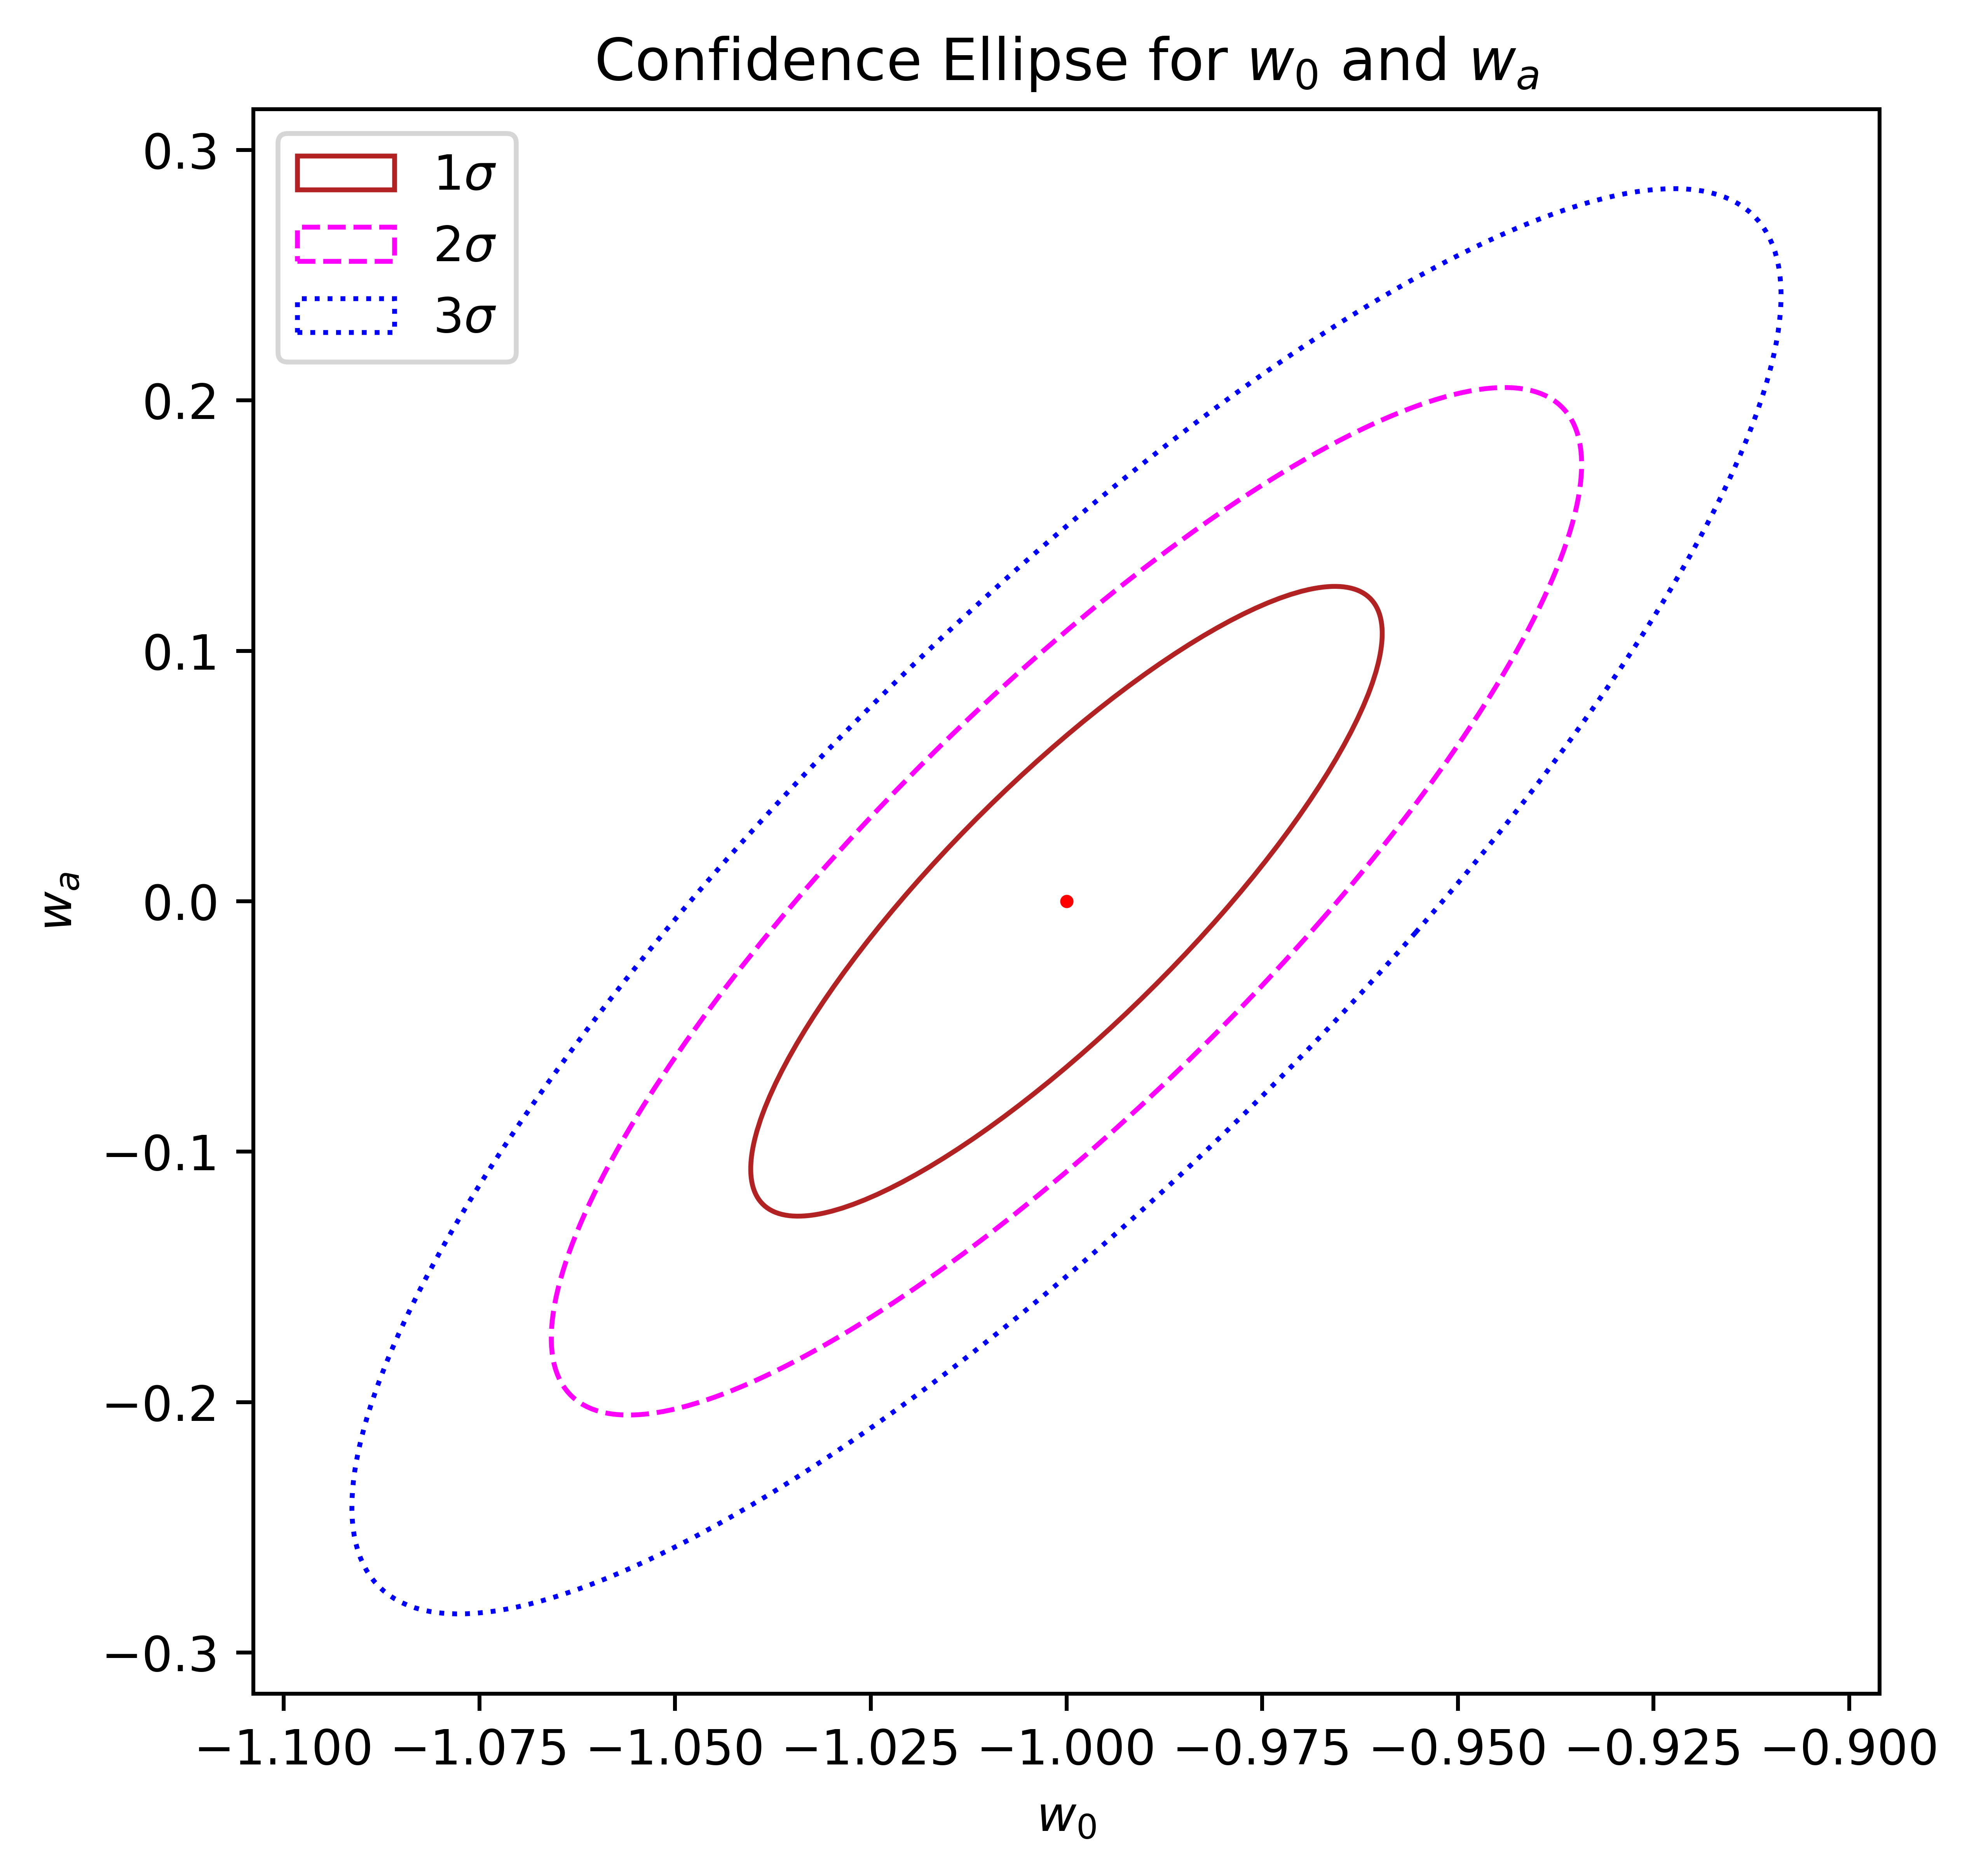

216.40183476422106

In [29]:
print("order of calculation 1: fixing parameters")
plotConfidenceEllipse_sub(sub_order1, "w_0", "w_a")

order of calculation 2: marginalize over
w_0 = -1 +- 0.3550929981751972

w_a = 0 +- 0.11123661468668034

Figure of Merit for w_0 and w_a is 6.329219194836554



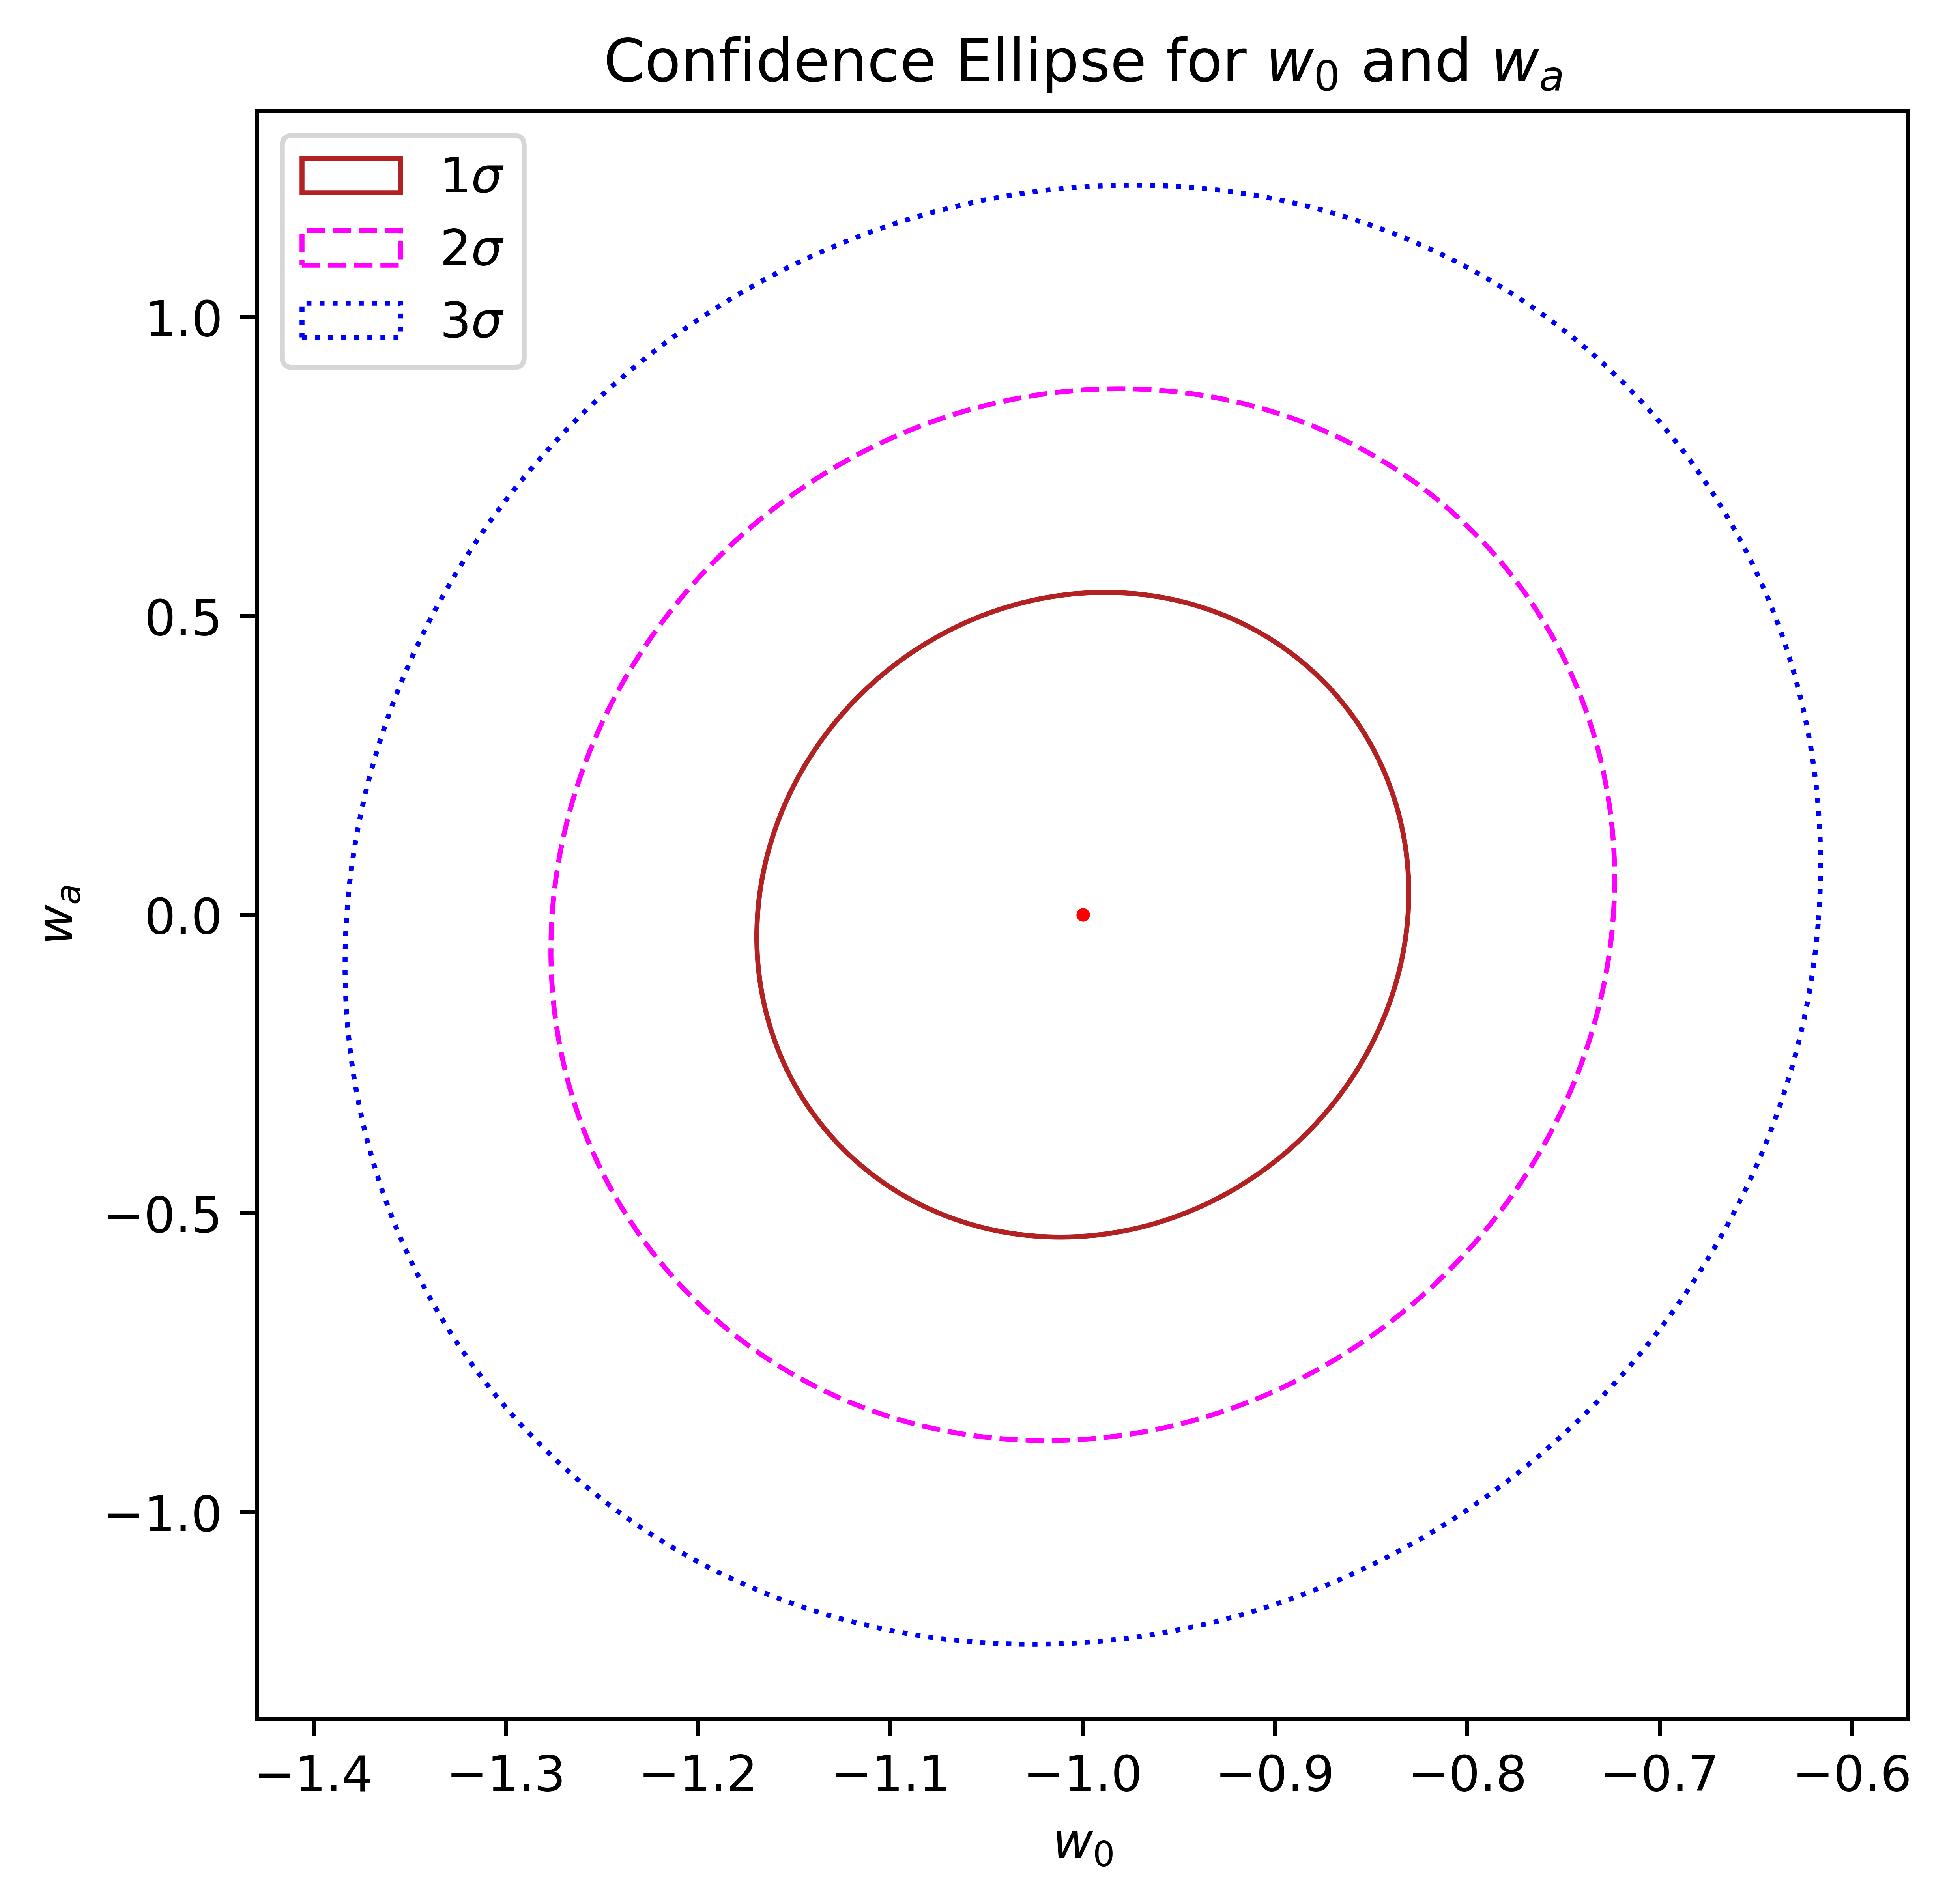

6.329219194836554

In [30]:
print("order of calculation 2: marginalize over")
plotConfidenceEllipse_sub(sub_order2, "w_0", "w_a")

In [31]:
sub_order3 = np.linalg.inv(subcov(fisher_f["n_4"], 'Omega_m', 'Omega_b'))
sub_order4 = subcov(np.linalg.inv(fisher_f["n_4"]), 'Omega_m', "Omega_b")

order of calculation 1:fixing parameter
Omega_m = 0.315 +- 0.004626908204907377

Omega_b = 0.045 +- 0.0021661705423570775

Figure of Merit for Omega_m and Omega_b is 24943.447577945528



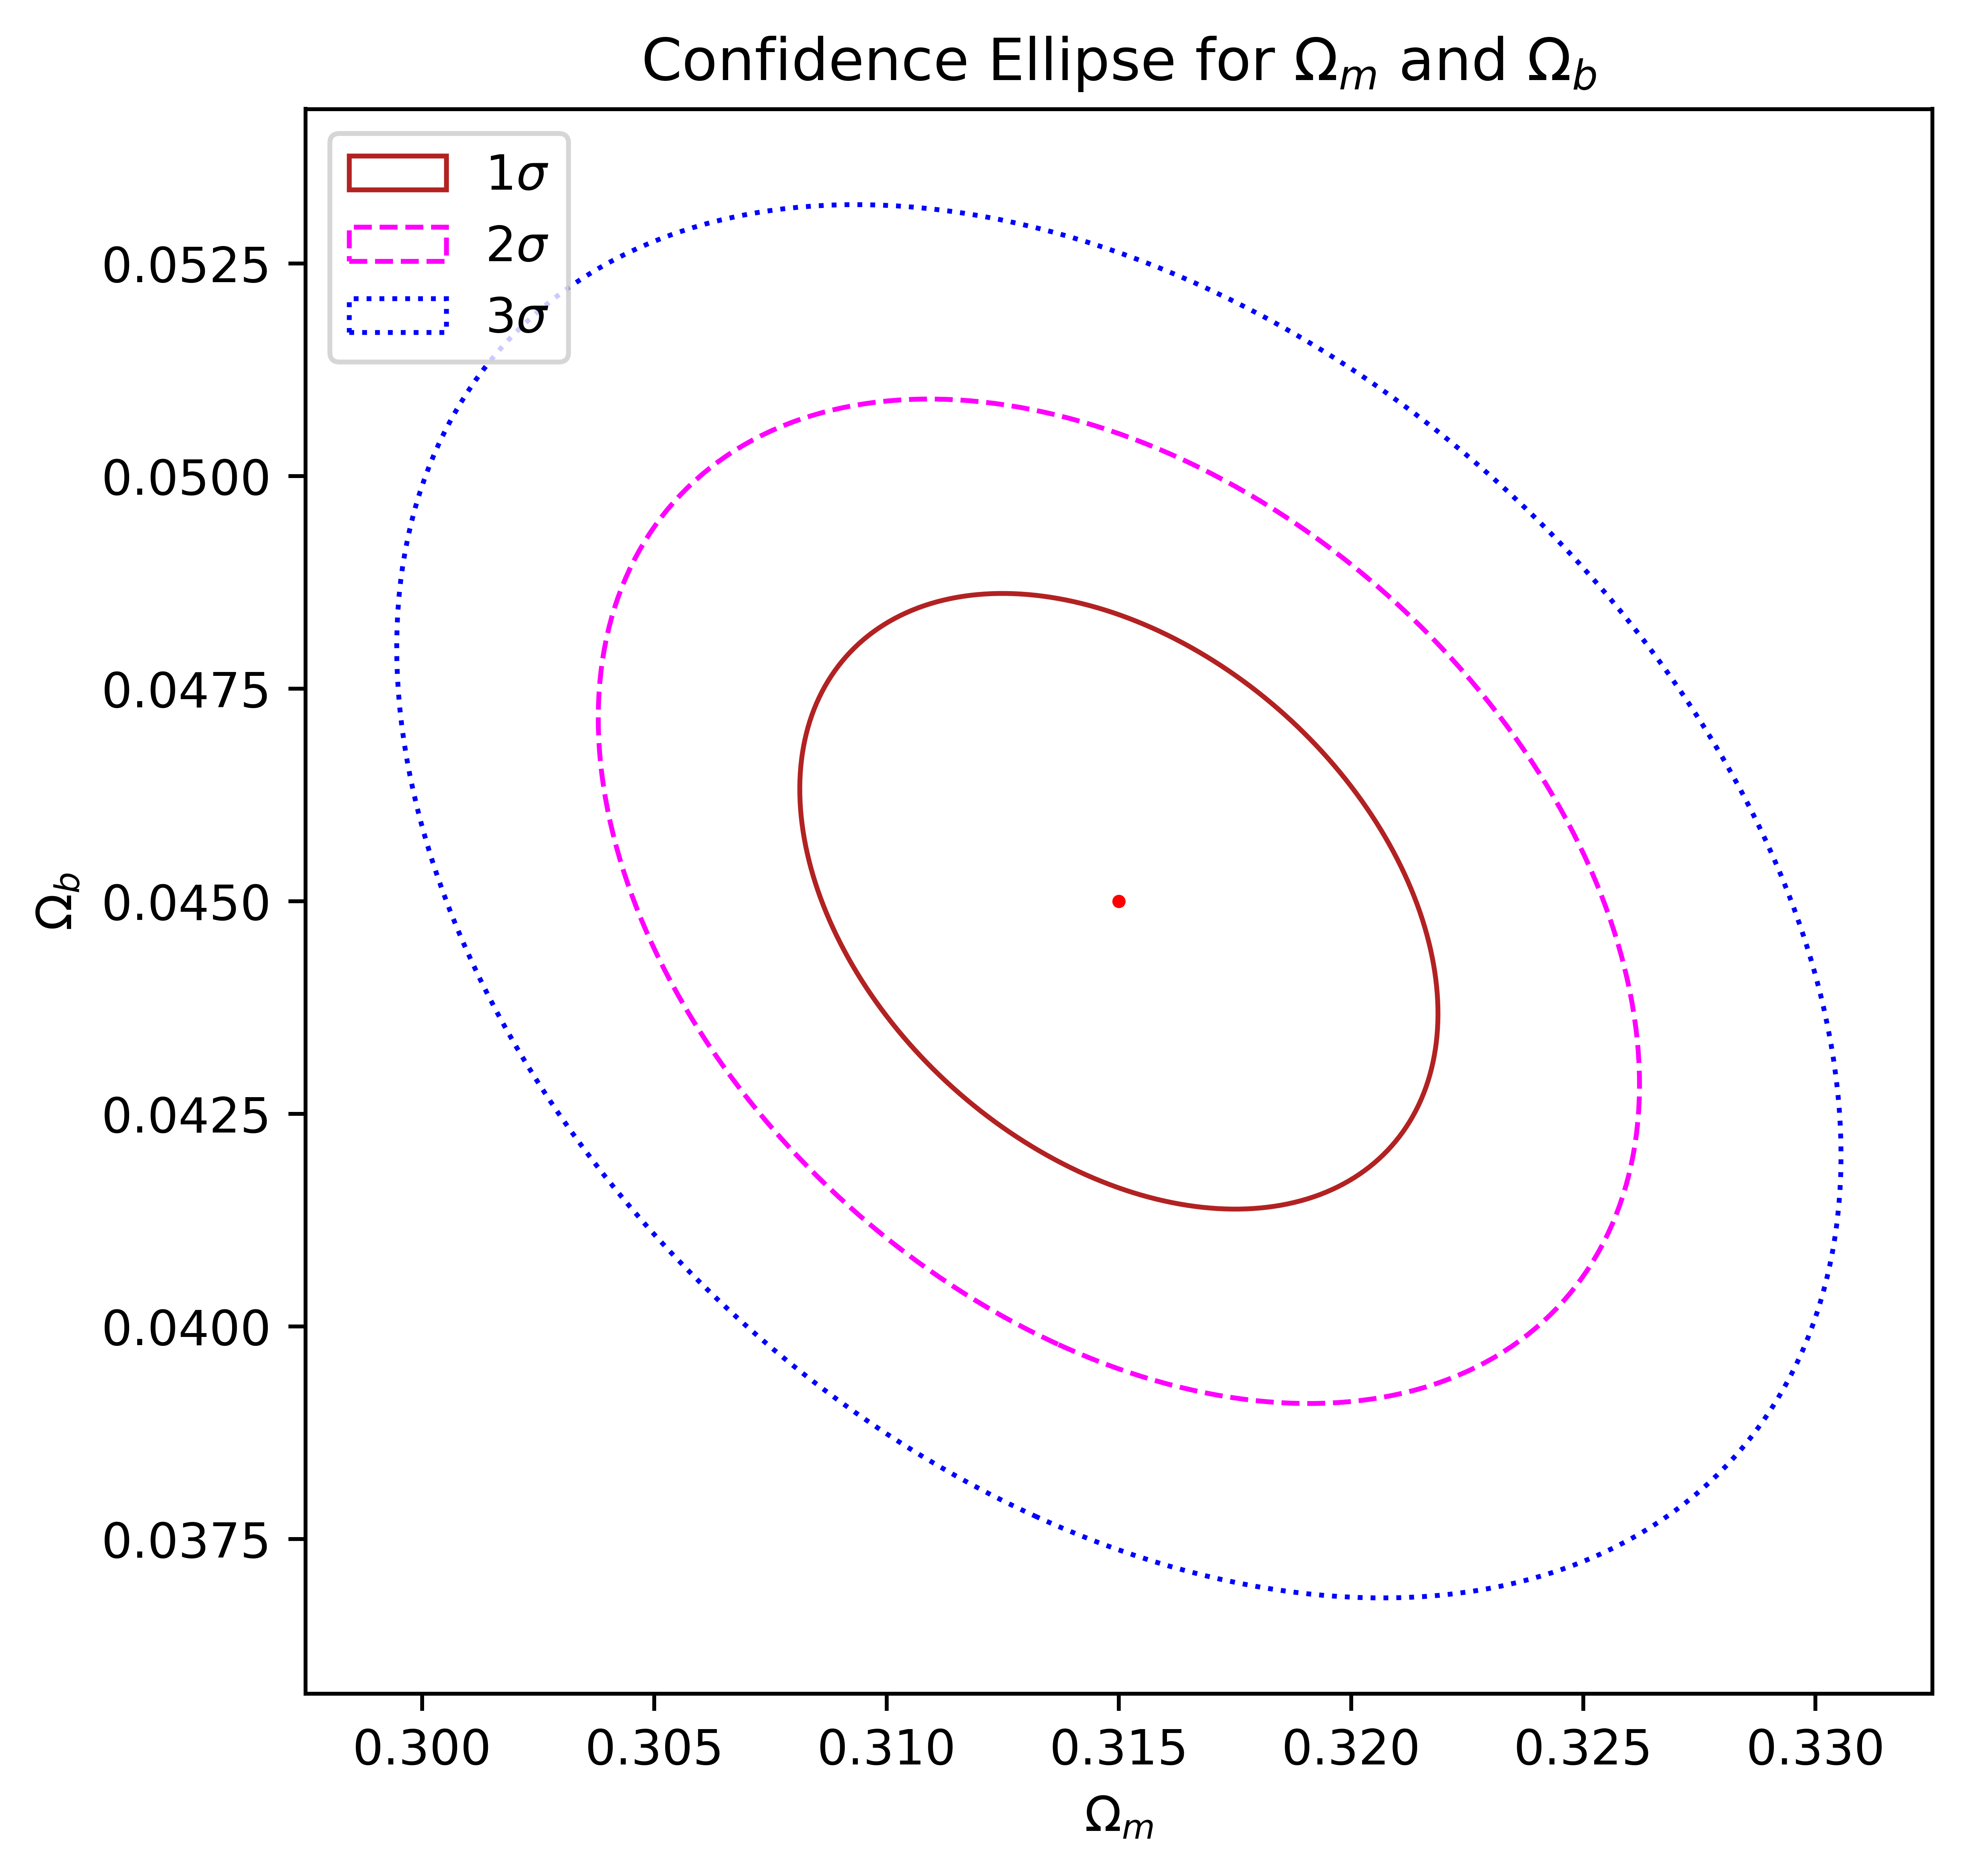

24943.447577945528

In [32]:
print("order of calculation 1:fixing parameter")
plotConfidenceEllipse_sub(sub_order3, 'Omega_m', 'Omega_b')

order of calculation 2: marginalize over
Omega_m = 0.315 +- 1.4759328754898762

Omega_b = 0.045 +- 0.06230170361206575

Figure of Merit for Omega_m and Omega_b is 2.718776327023718



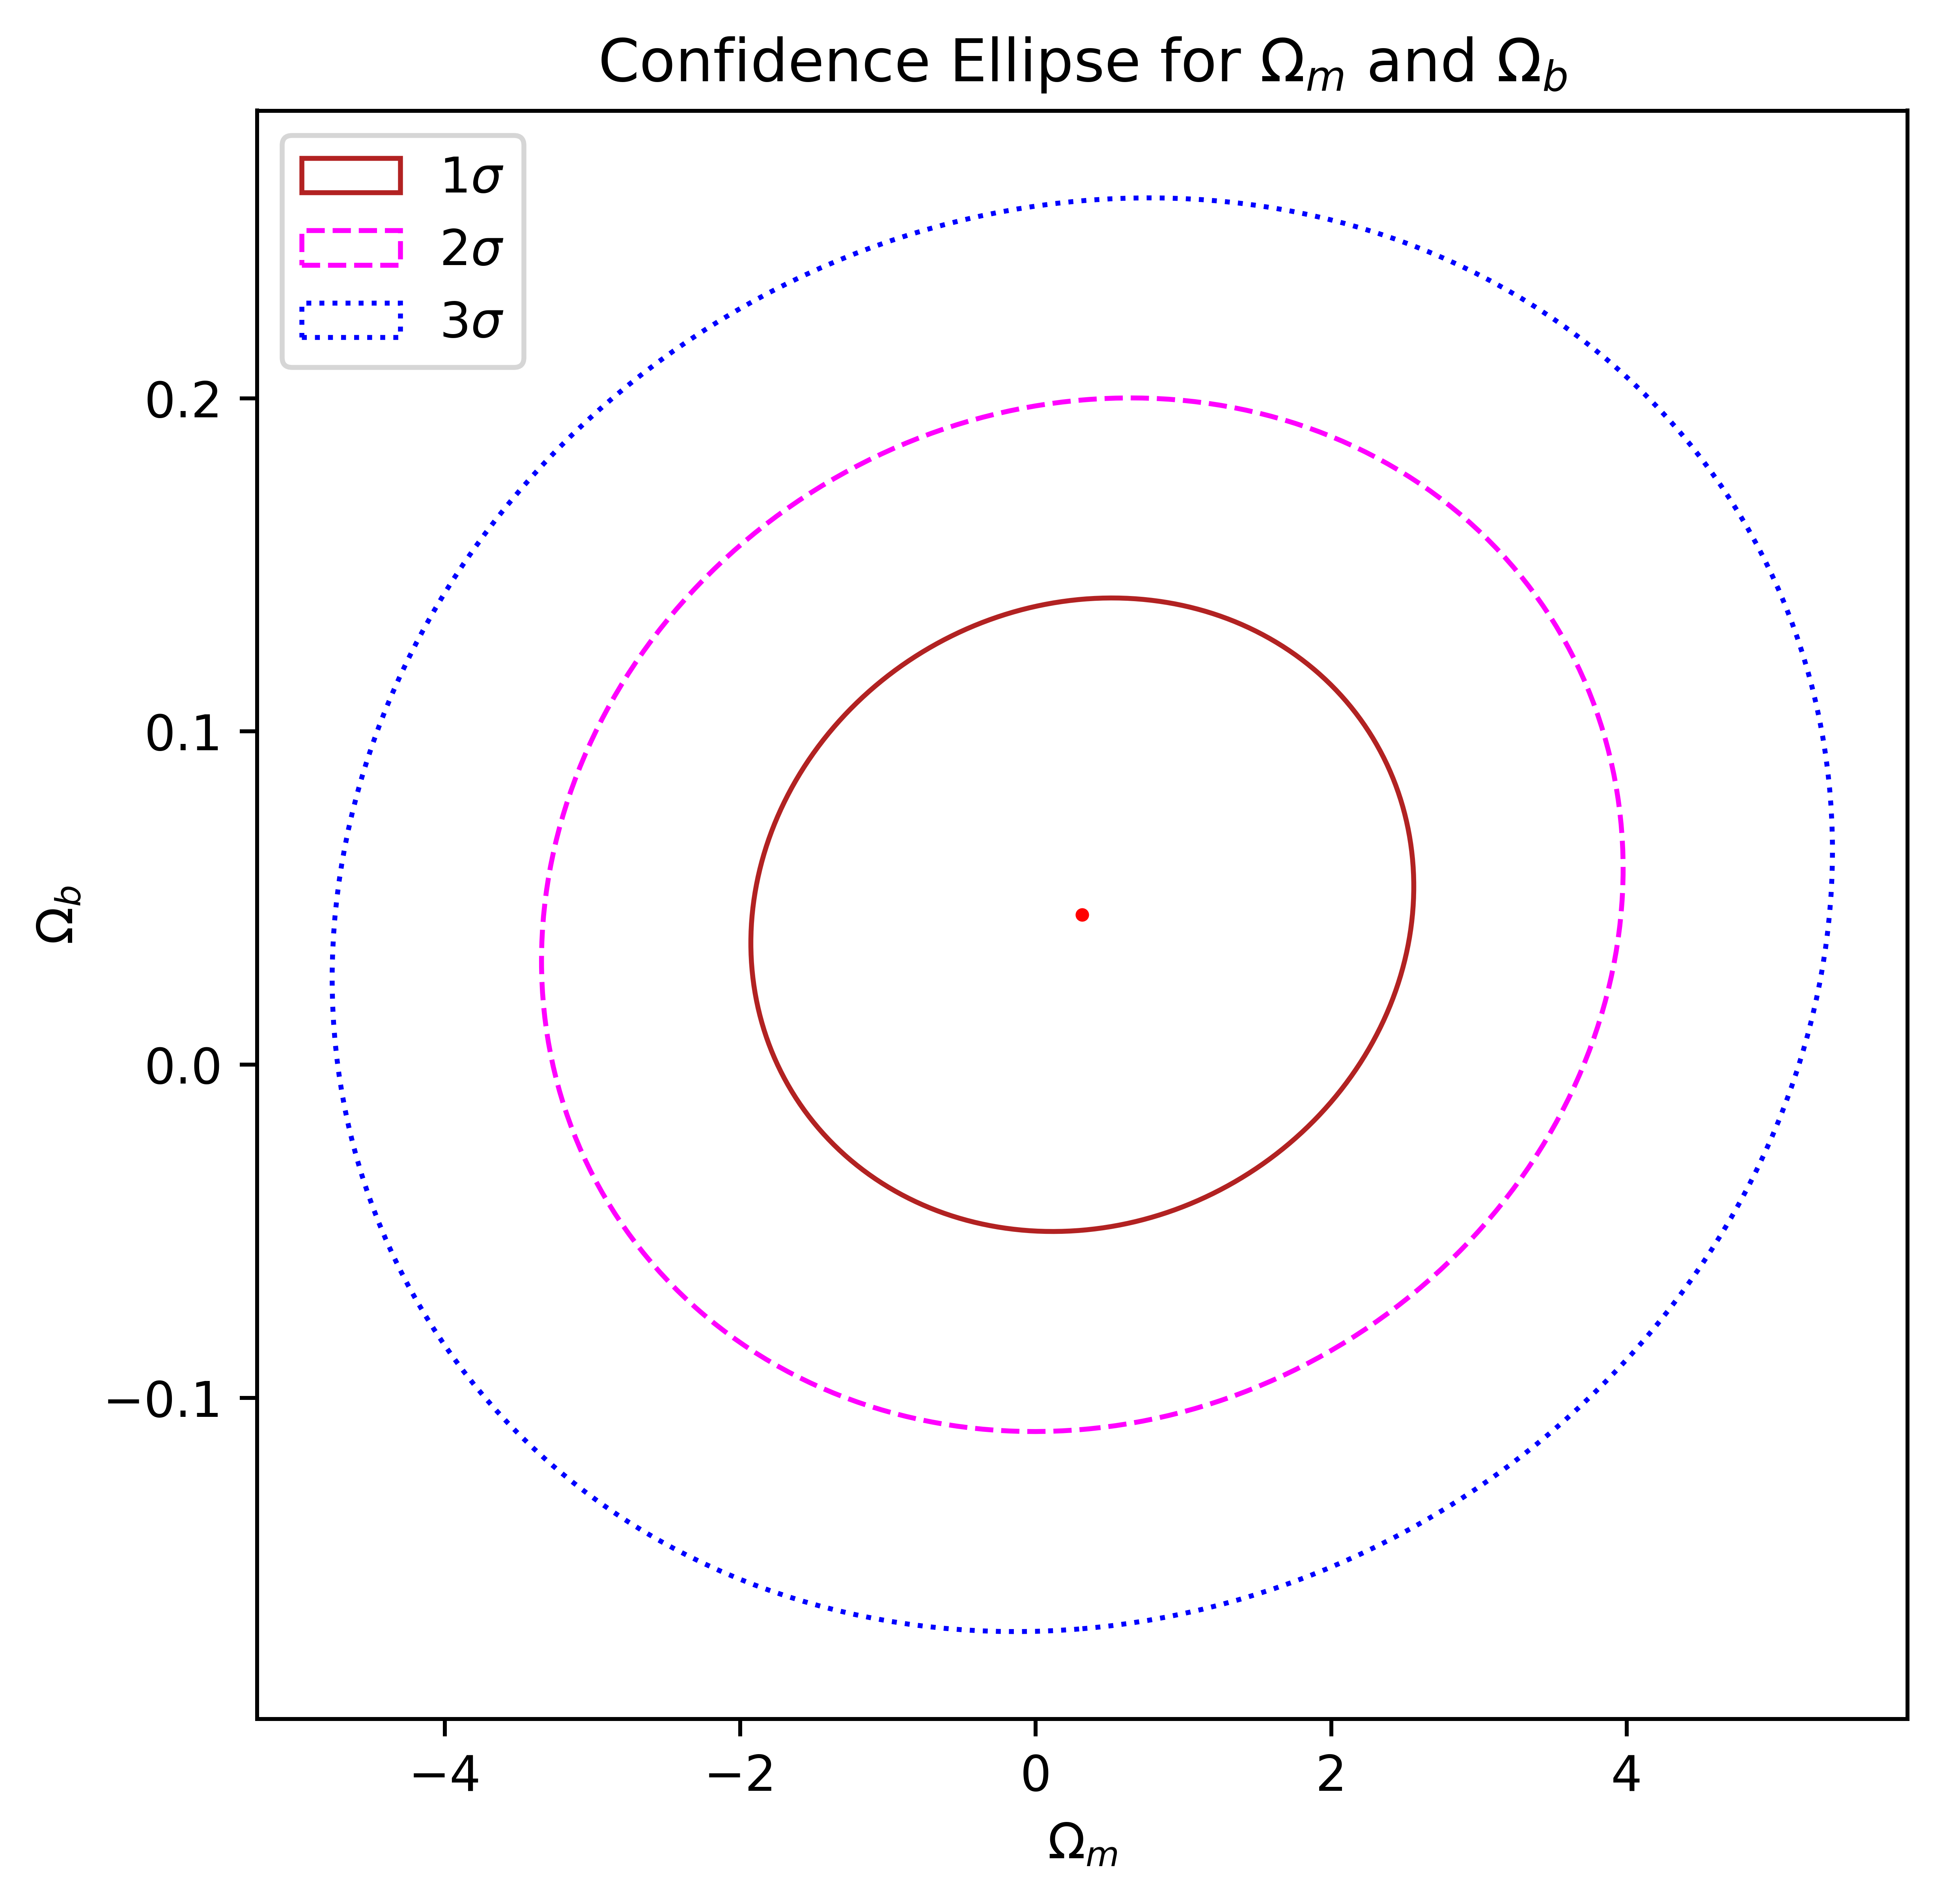

2.718776327023718

In [33]:
print("order of calculation 2: marginalize over")
plotConfidenceEllipse_sub(sub_order4, 'Omega_m', 'Omega_b')

In [34]:
print(sub_order3)

[[5.67127022e-06 3.92506623e-06]
 [3.92506623e-06 2.04293041e-05]]


In [35]:
print(sub_order4)

[[ 0.00391277 -0.00824504]
 [-0.00824504  2.17834659]]


In [50]:
#what if we don't marginalize over w_0 and w_a? keeping them as known values instead?

ixgrid = np.ix_([0, 1, 2, 5, 6], [0, 1, 2, 5, 6])
ixgrid

(array([[0],
        [1],
        [2],
        [5],
        [6]]),
 array([[0, 1, 2, 5, 6]]))

In [47]:
fisher_reduced = fisher_f["n_4"][ixgrid]

In [48]:
cov_reduced = cov_cosmo_para(fisher_reduced)

order of calculation 2: marginalize over signa_8, n_s, and h
Omega_m = 0.315 +- 0.028496231206546607

Omega_b = 0.045 +- 0.0019631866847683982

Figure of Merit for Omega_m and Omega_b is 11236029.104369432



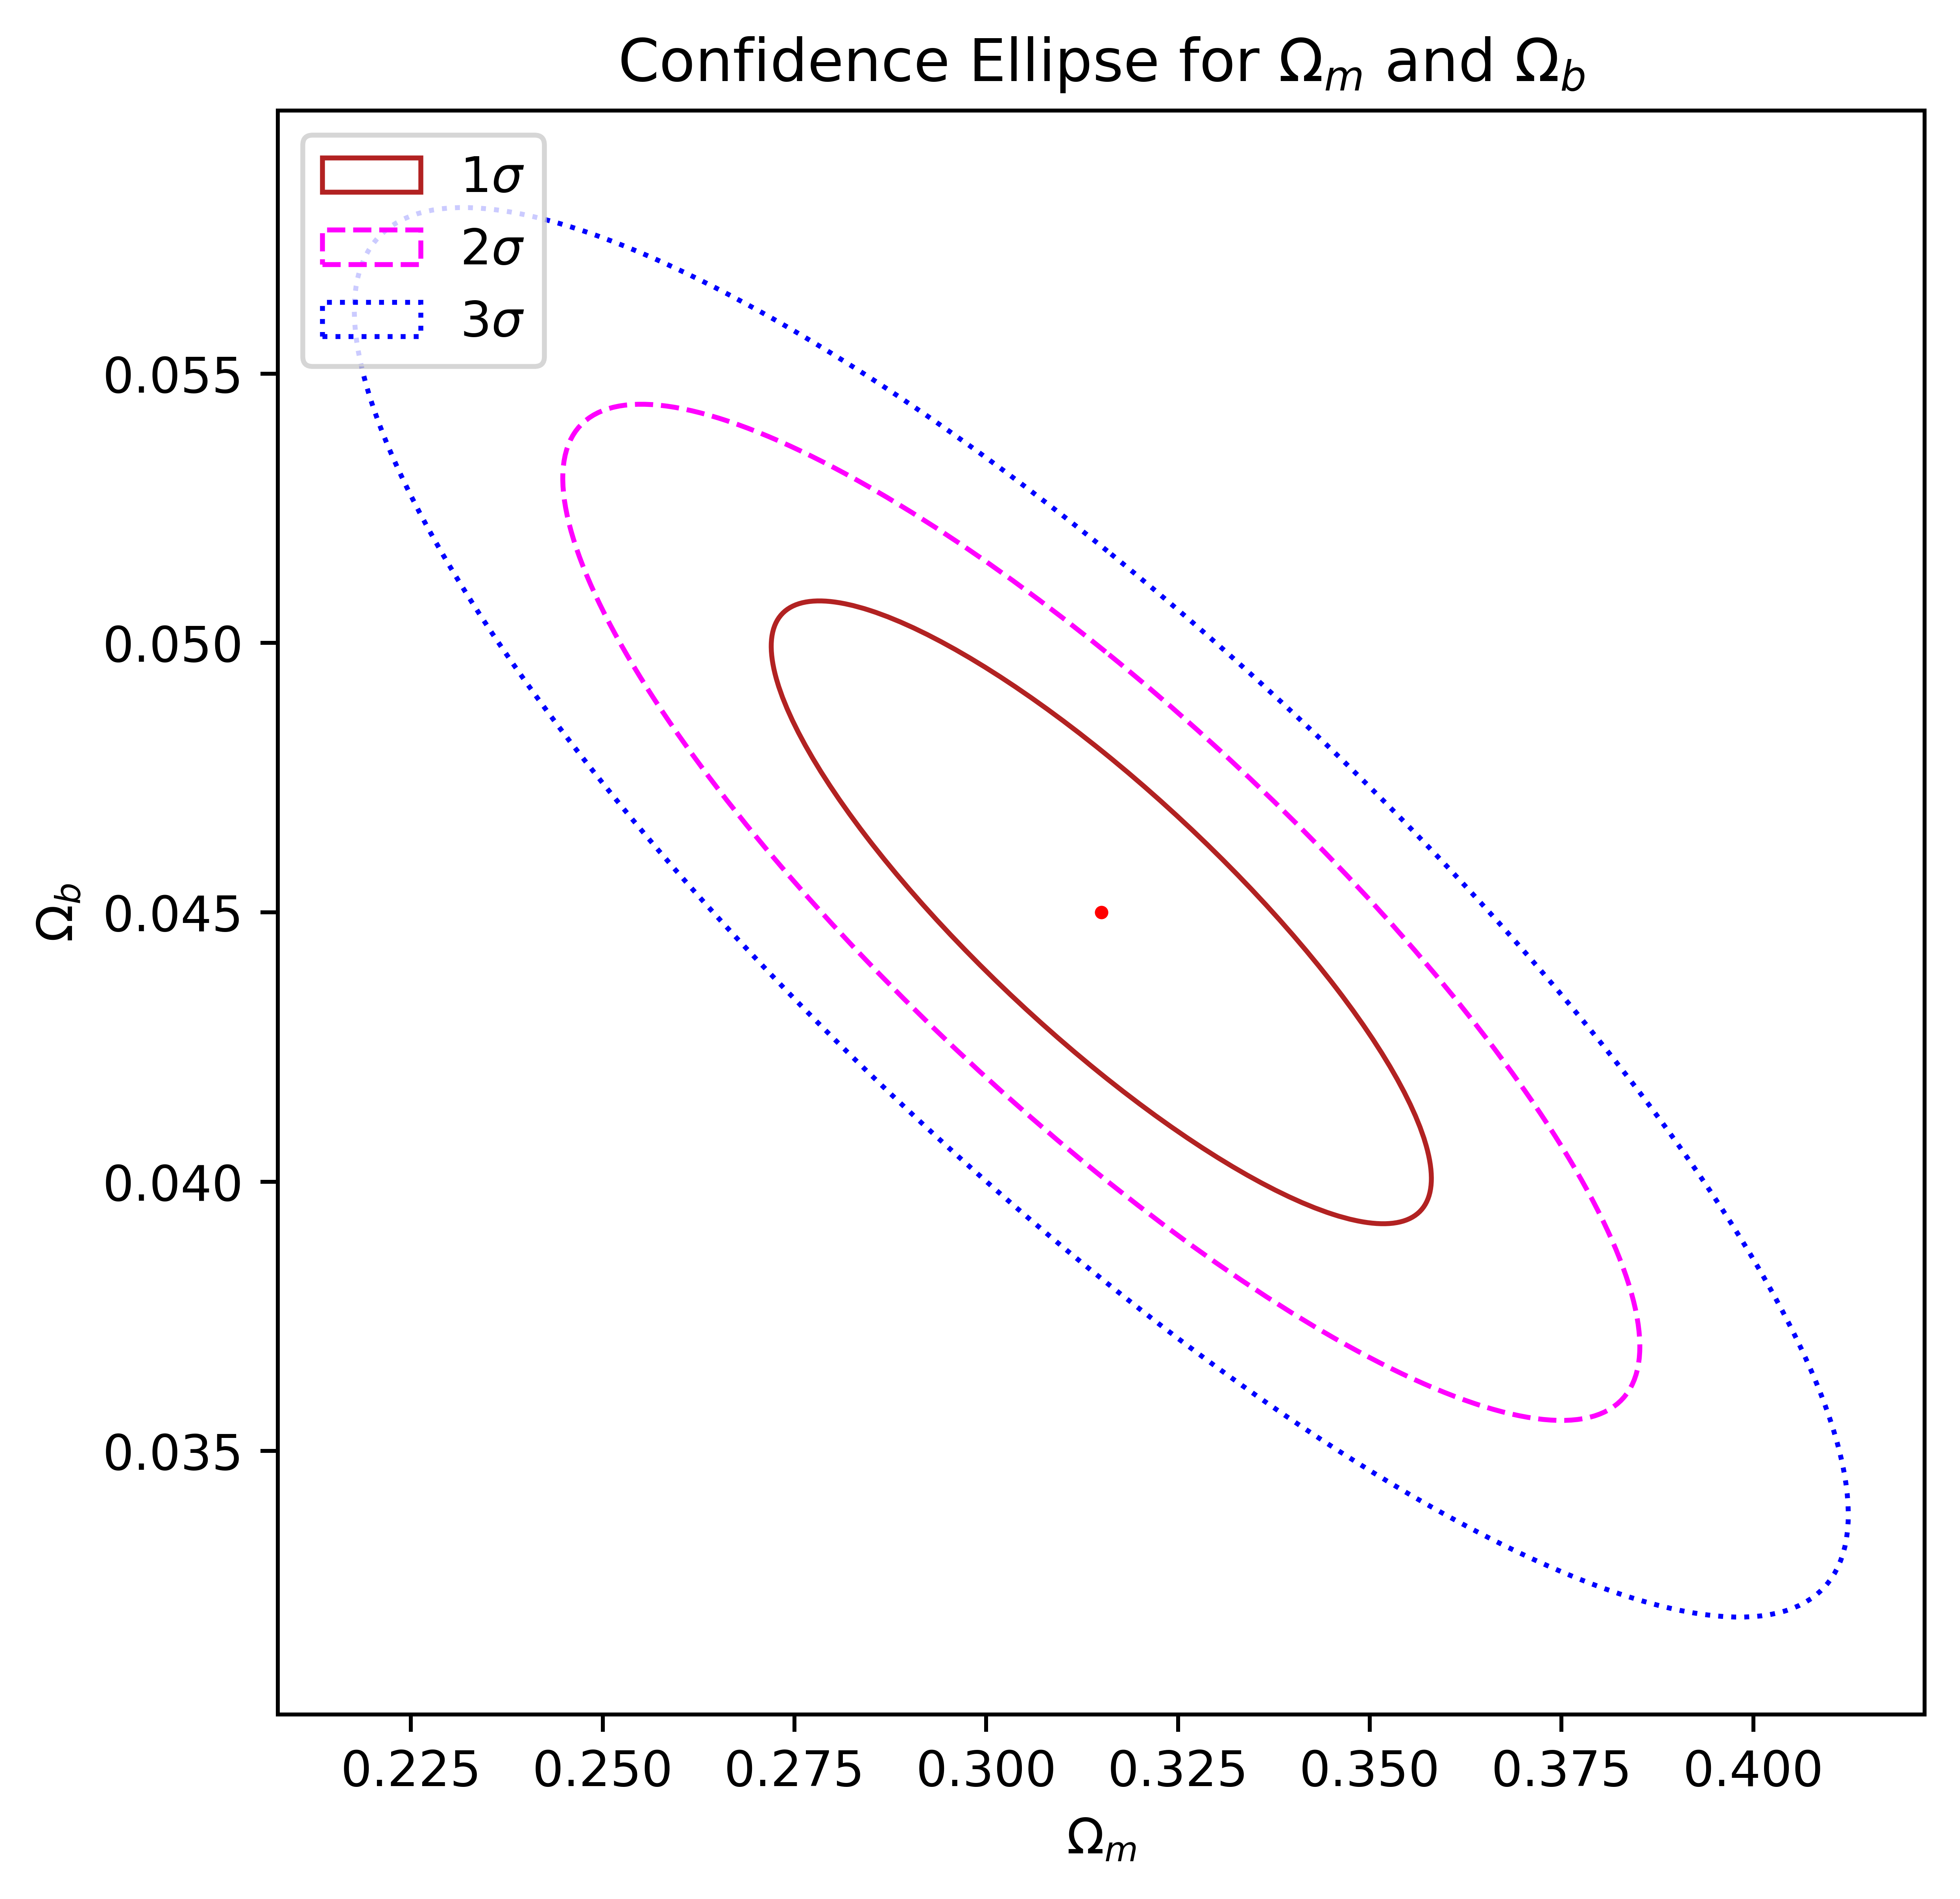

11236029.104369432

In [49]:
print("order of calculation 2: marginalize over signa_8, n_s, and h")
plotConfidenceEllipse_sub(cov_reduced, 'Omega_m', 'Omega_b')